# Testing and demonstrating the Plot class

In [45]:
from plotter import Plot

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Reading data

In [2]:
pl = Plot("./data/deviation.json", display=True, output_path="./plots")

In [26]:
pl.df

name  gt_corners  rb_corners       mean        max  \
0         Schlafzimmer           4           4   3.956313   8.562939   
1                Küche           4           4  23.019122  52.605437   
2             Bathroom           4           4   1.013833   1.950322   
3         Lounge/Diner           8           8   3.832620  18.236935   
4           Essbereich           4           4   8.017758  15.642853   
...                ...         ...         ...        ...        ...   
1342    Master Bedroom           4           4   1.739907   4.703960   
1343  Master Bedroom 2           4           4   0.530908   0.786997   
1344          Zimmer I           4           4   0.880569   1.221873   
1345  Hallway Bathroom           6           6  24.923452  64.266820   
1346         Bedroom 4           4           4   0.387328   0.762659   

           min  floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  \
0     0.274574    3.987864   8.562939   0.274574      3.924762     8.501885   
1     0.724299    1.253103   1.897612   0.724299     44.785141    52.605437   
2     0.301673    0.659138   1.318714   0.301673      1.368528     1.950322   
3     0.173307    3.600083  15.041431   0.173307      4.065157    18.236935   
4     0.762948    7.819446  15.399635   0.762948      8.216069    15.642853   
...        ...         ...        ...        ...           ...          ...   
1342  0.166677    0.487452   1.074033   0.166677      2.992362     4.703960   
1343  0.101973    0.323746   0.614770   0.101973      0.738071     0.786997   
1344  0.362600    0.823587   1.120810   0.362600      0.937550     1.221873   
1345  0.064699   24.857904  64.123596   0.064699     24.988999    64.266820   
1346  0.166426    0.349720   0.730373   0.205136      0.424936     0.762659   

      ceiling_min  
0        0.331494  
1       36.880814  
2        0.878106  
3        0.253457  
4        0.909029  
...           ...  
1342     1.216172  
1343     0.670290  
1344     0.490739  
1345     0.074356  
1346     0.166426  

[1347 rows x 12 columns]

In [3]:
df = pl.df.drop('name', axis=1)

Some consistency checks

in each row max("floor_max", "ceiling_max") must be equal to "max"

In [47]:
sum(( np.array(df["max"]) - np.array(list(map(max, zip(df.floor_max, df.ceiling_max)))))**2 )

0.0

## EDA - A Quick Glance

In [23]:
df.describe()

gt_corners   rb_corners         mean          max          min  \
count  1347.000000  1347.000000  1347.000000  1347.000000  1347.000000   
mean      4.307350     4.307350    12.895320    25.448011     2.920388   
std       0.814412     0.814412    21.839948    42.758159     9.258972   
min       4.000000     4.000000     0.192973     0.323886     0.007456   
25%       4.000000     4.000000     0.658488     1.243804     0.147432   
50%       4.000000     4.000000     2.123456     4.703514     0.279876   
75%       4.000000     4.000000    14.810982    28.312051     0.674444   
max      10.000000    10.000000   121.301055   179.165483    81.764483   

        floor_mean    floor_max    floor_min  ceiling_mean  ceiling_max  \
count  1347.000000  1347.000000  1347.000000   1347.000000  1347.000000   
mean     11.022443    20.405499     3.146246     14.768198    24.848020   
std      19.136320    33.189081     9.559611     26.047057    42.345579   
min       0.134686     0.178059     0.007456      0.123169     0.220846   
25%       0.514150     0.888043     0.164668      0.742915     1.180960   
50%       1.932503     4.008014     0.304374      2.159995     3.777277   
75%      13.430288    24.986504     0.801416     15.150233    27.551533   
max     121.244083   177.961811    81.791505    157.387474   179.165483   

       ceiling_min  
count  1347.000000  
mean      5.521437  
std      14.460565  
min       0.009268  
25%       0.306071  
50%       0.600597  
75%       1.840563  
max     144.472533

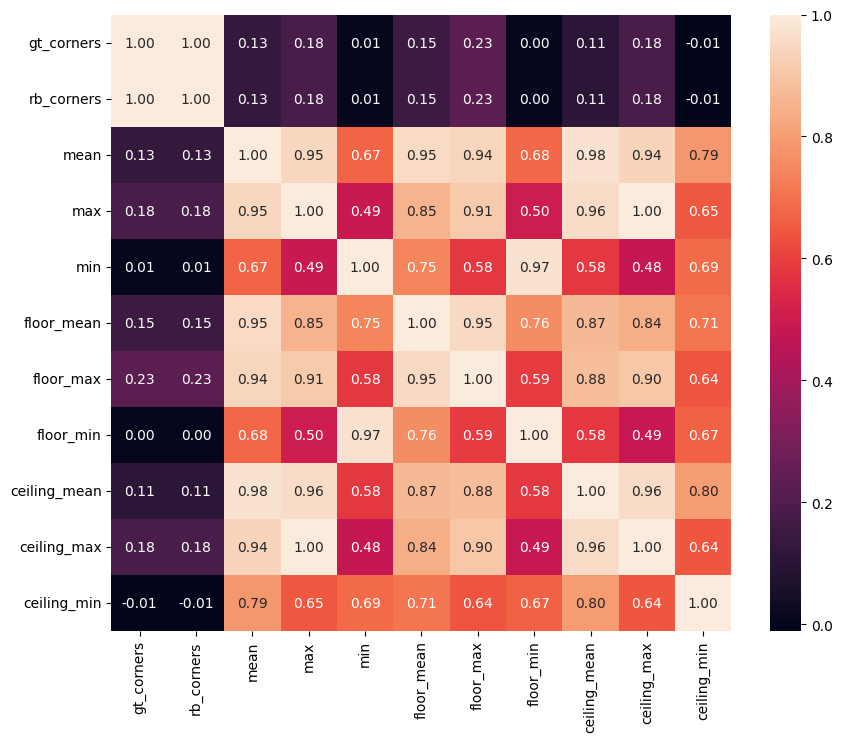

In [4]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

At least of the correlation coeffiecients is very close to 1


### Histograms

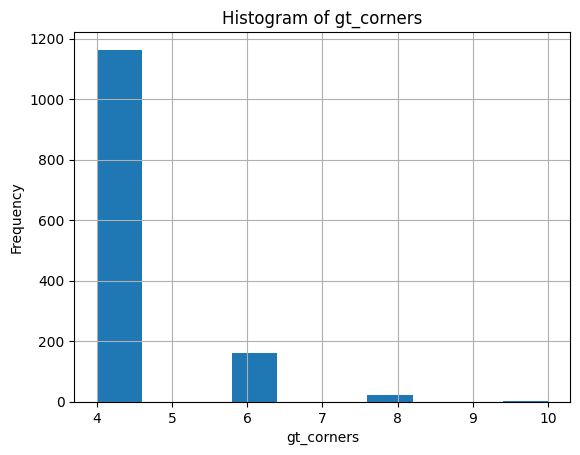

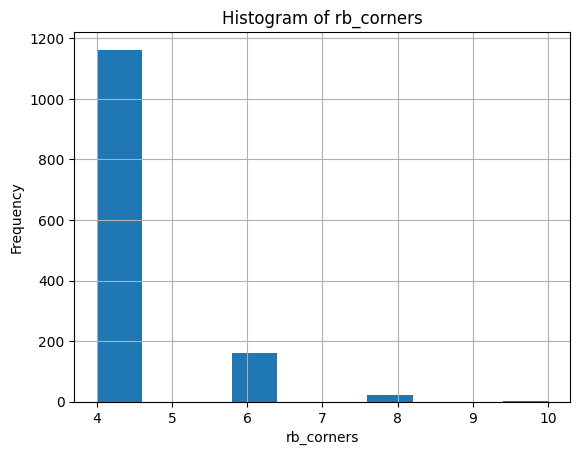

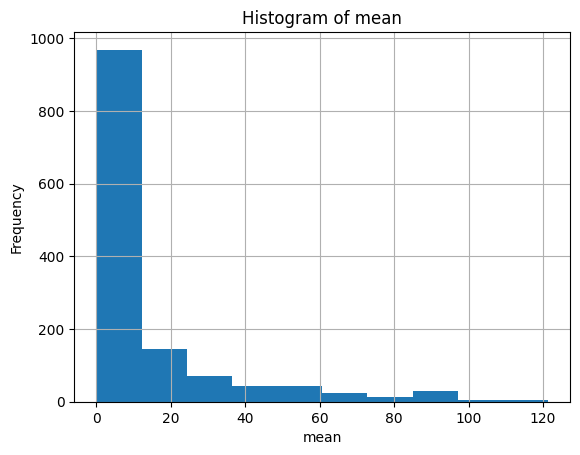

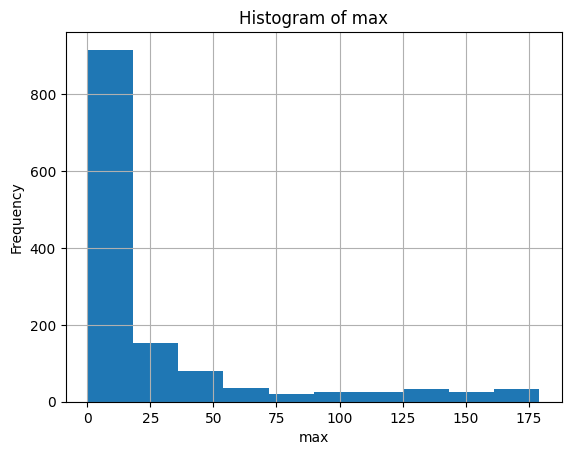

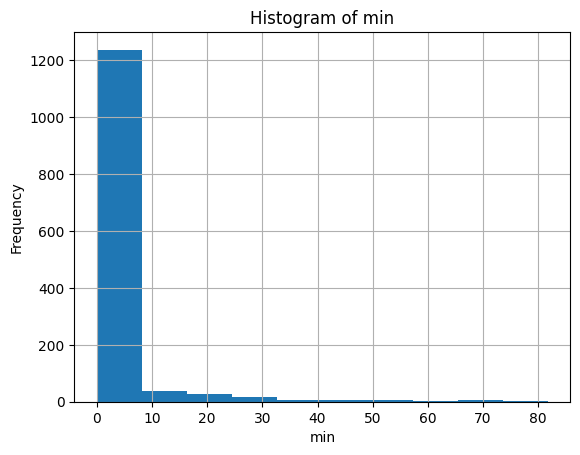

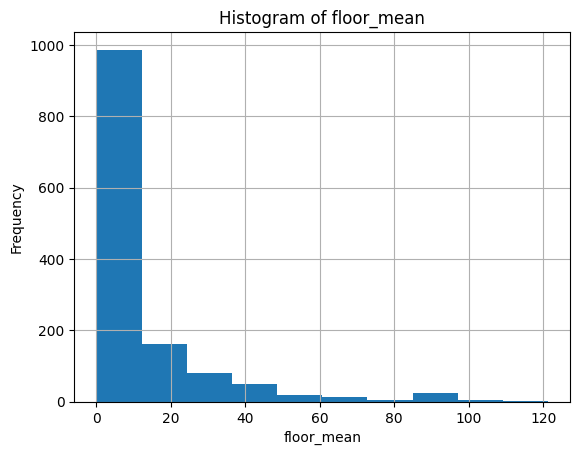

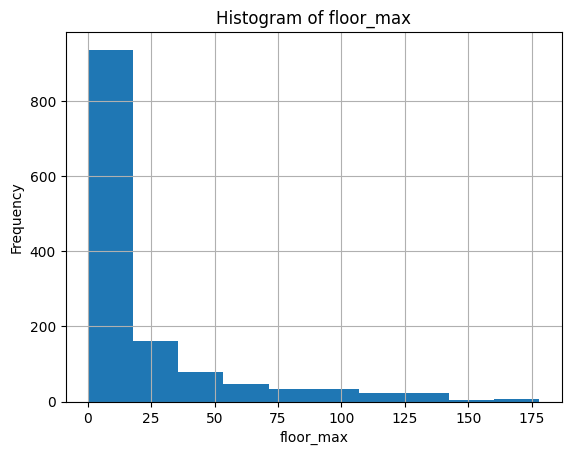

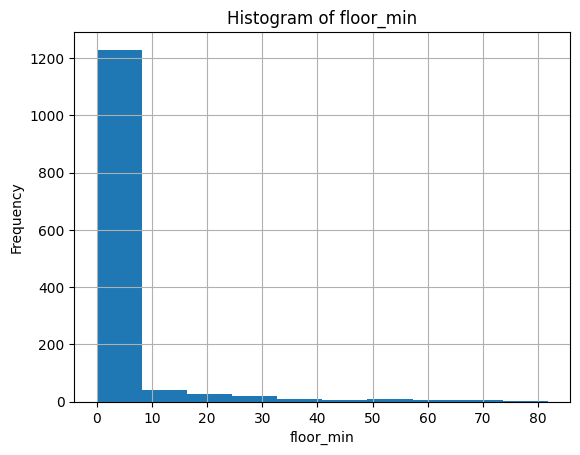

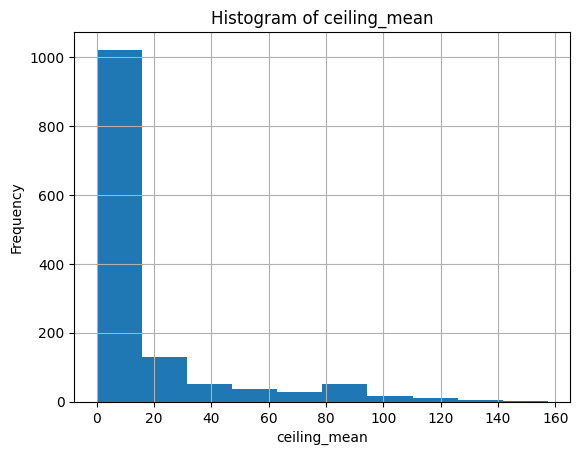

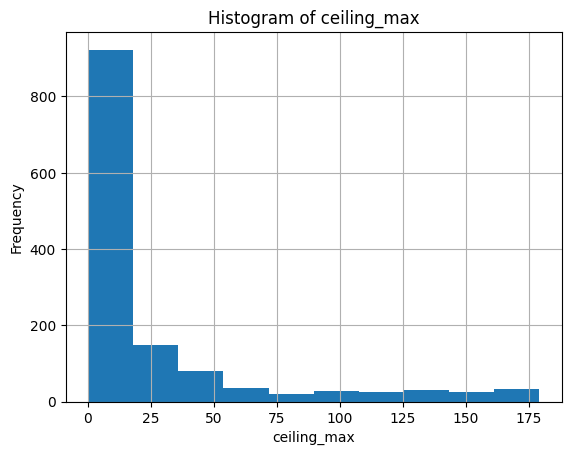

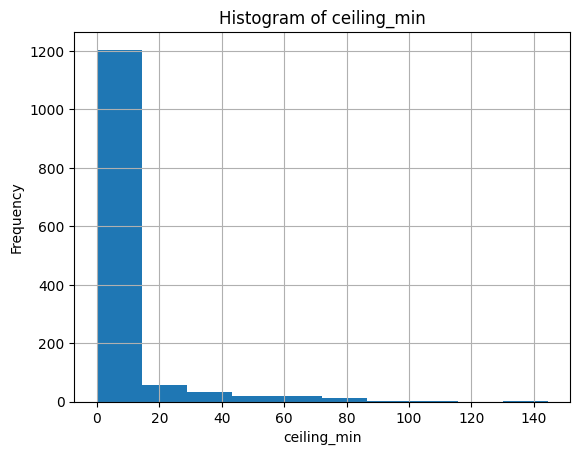

In [11]:
for col in df.columns:
    pl.hist(col)

## Pair plots

In [25]:
from itertools import product


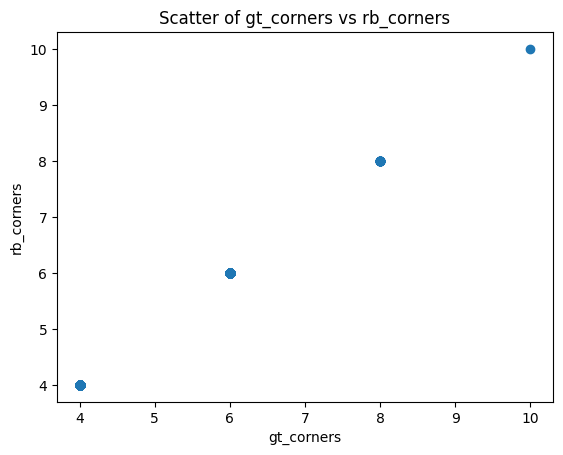

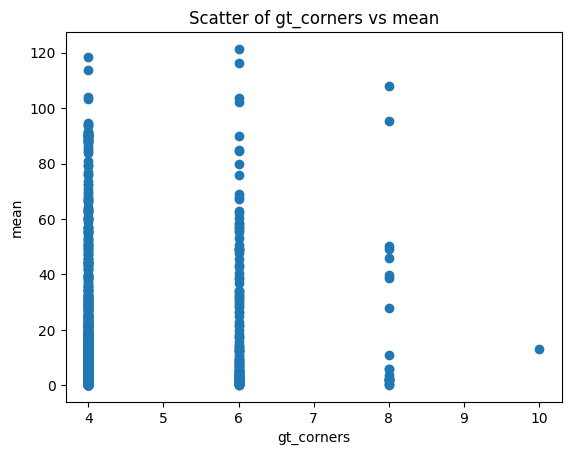

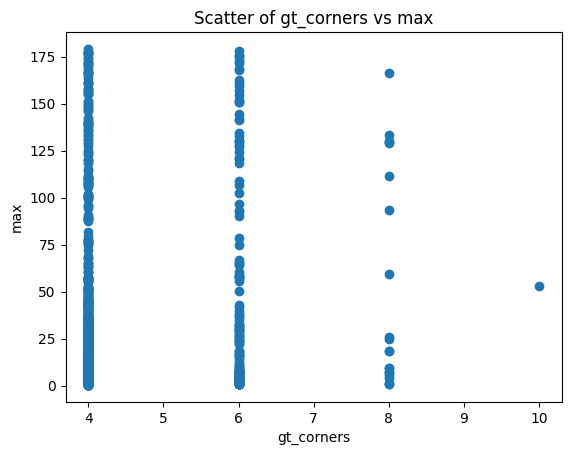

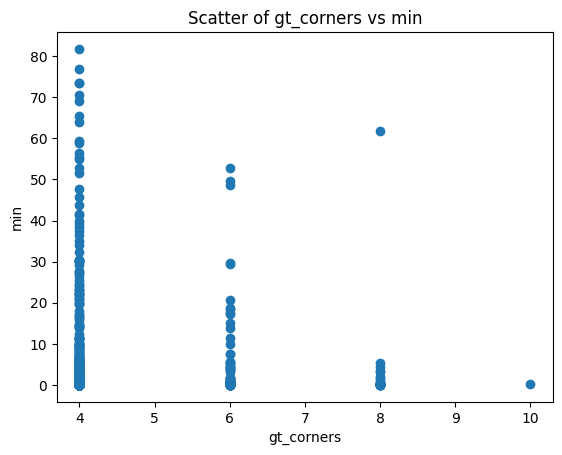

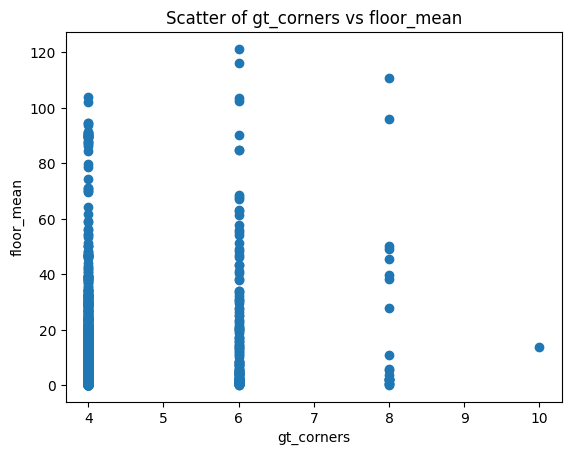

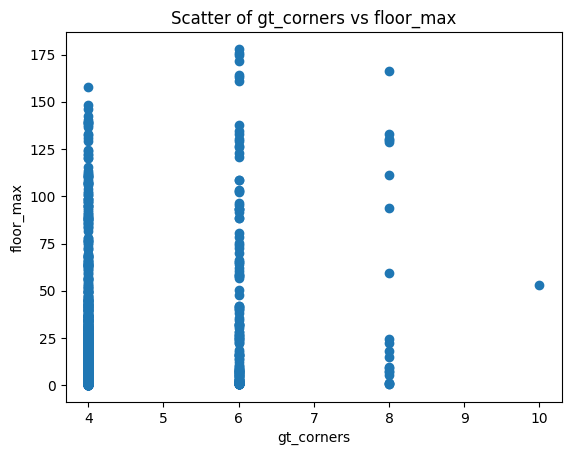

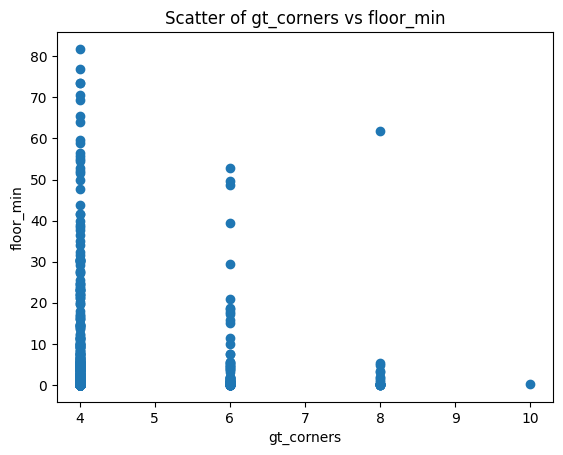

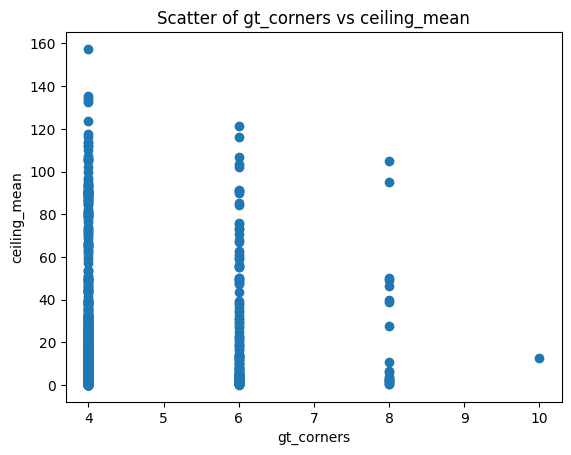

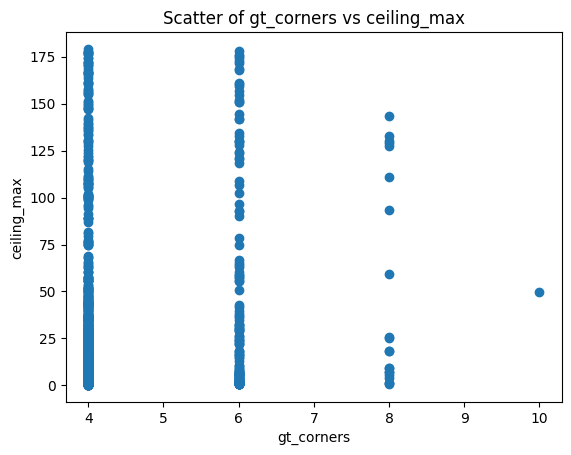

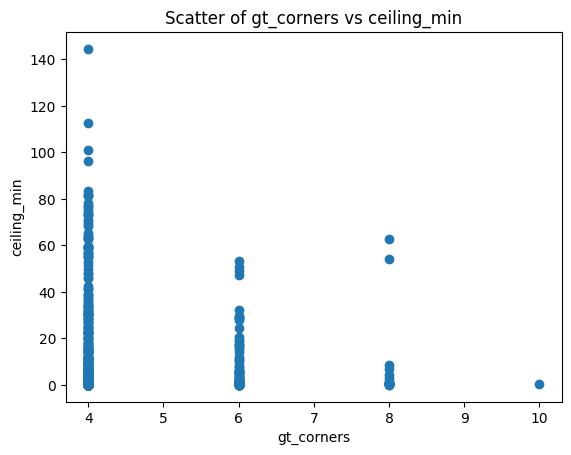

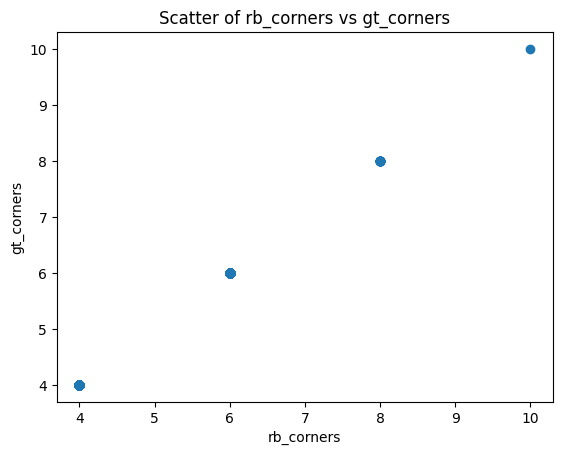

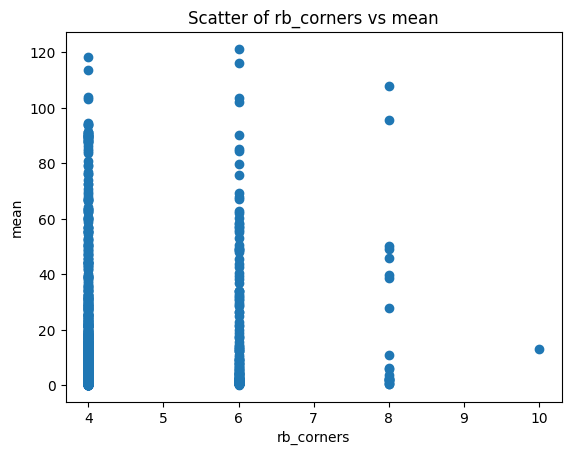

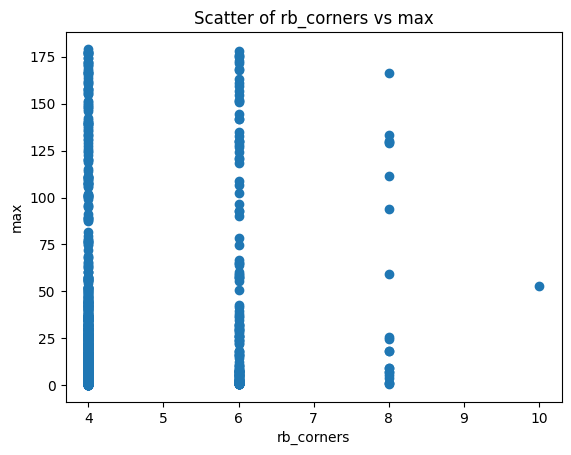

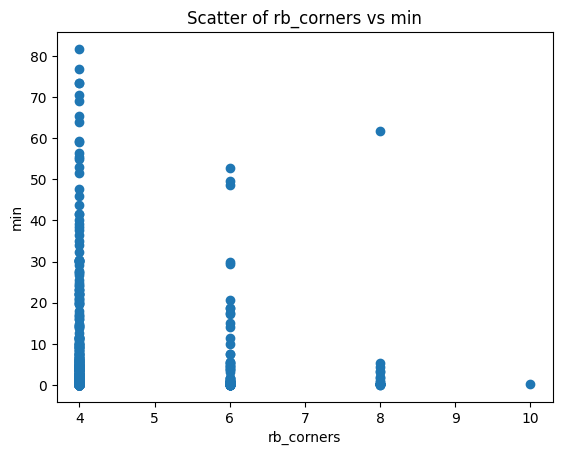

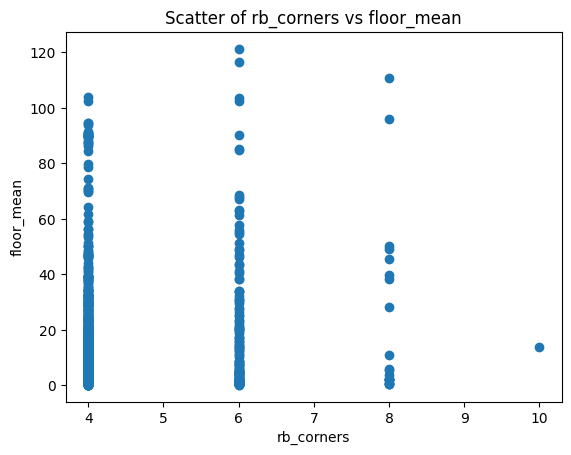

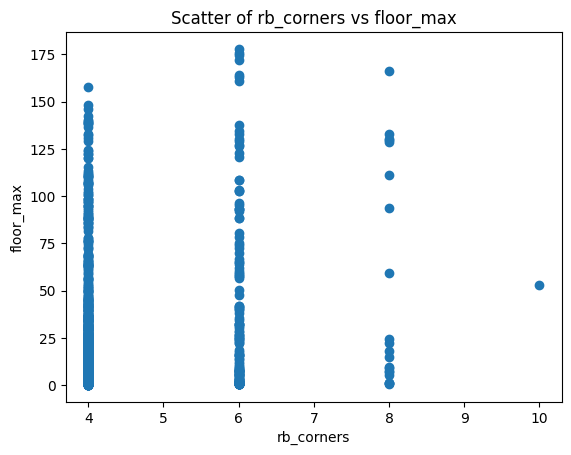

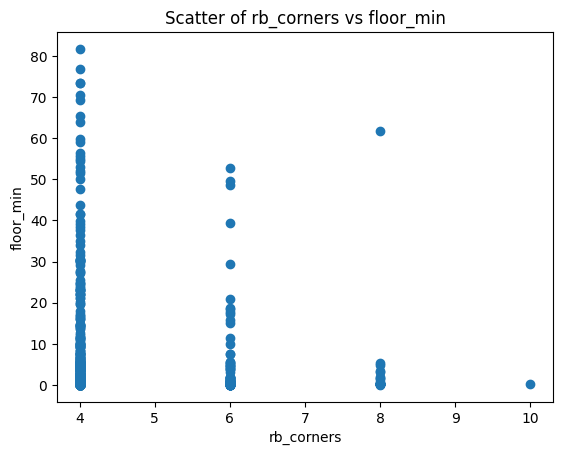

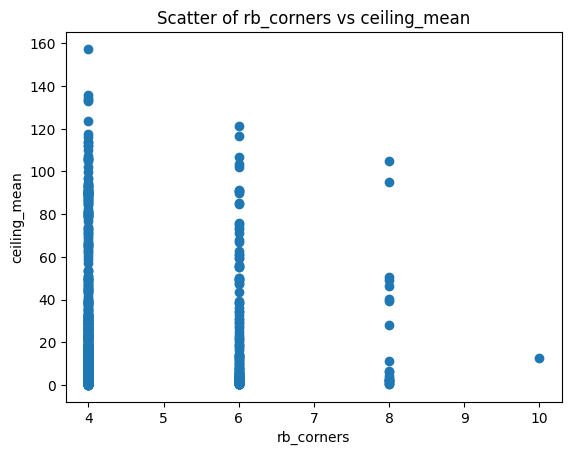

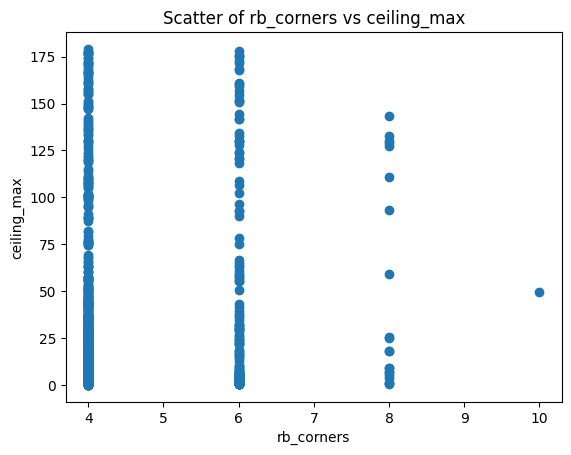

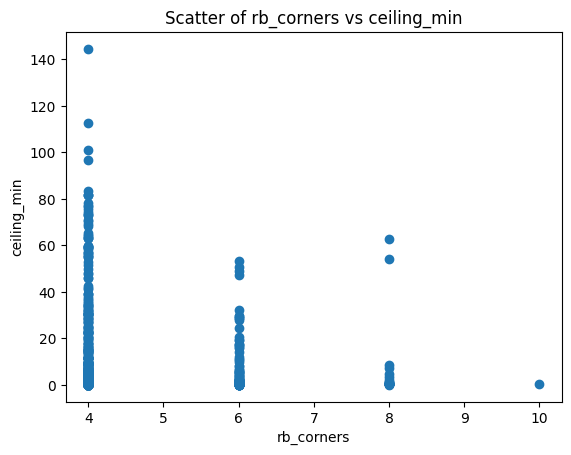

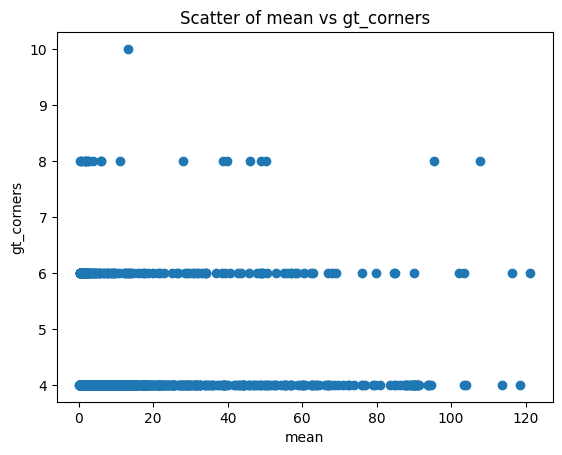

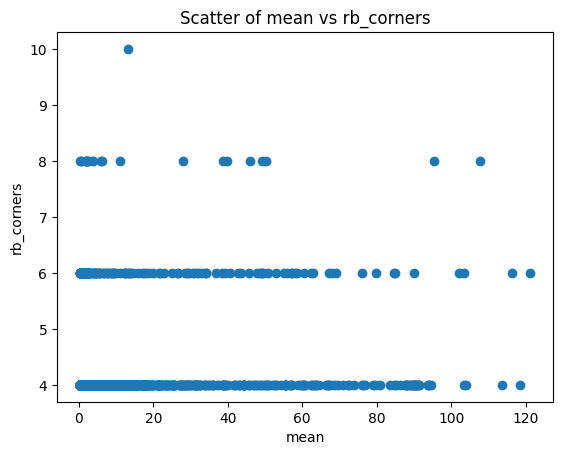

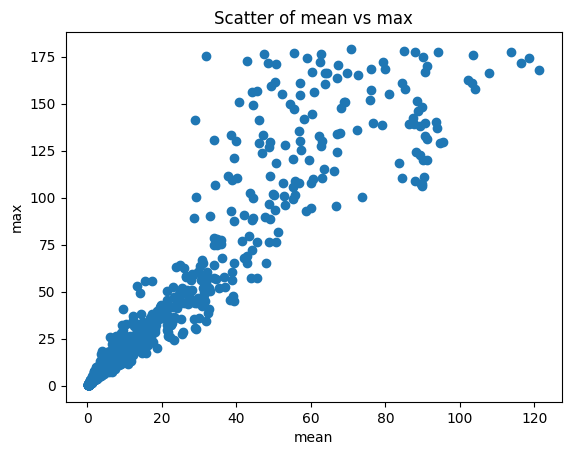

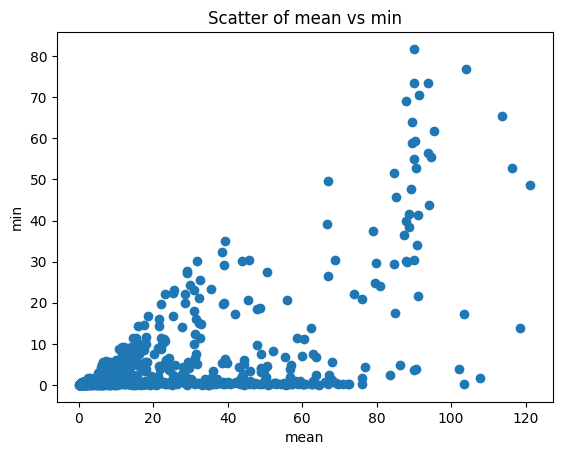

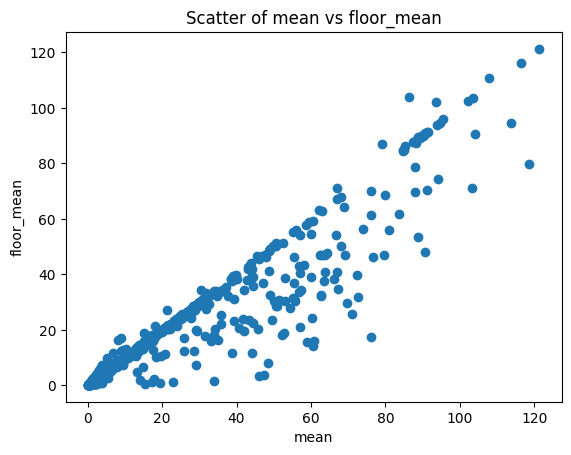

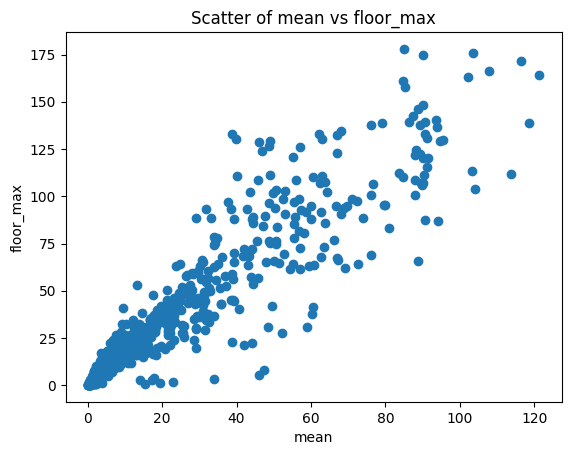

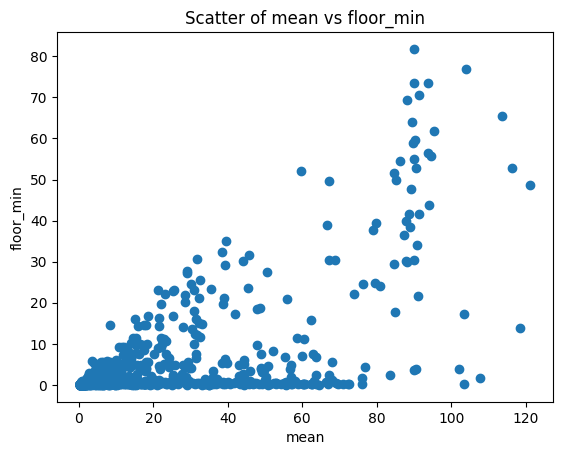

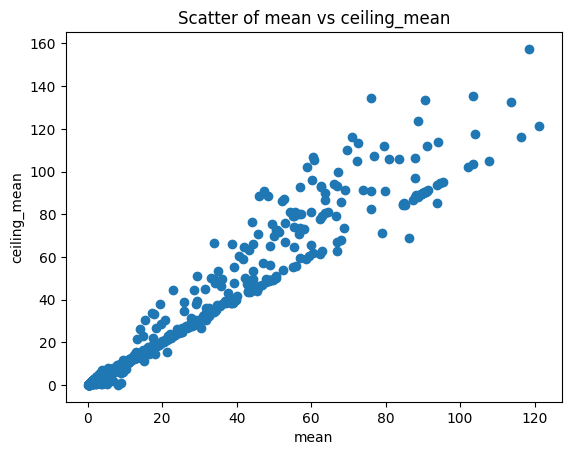

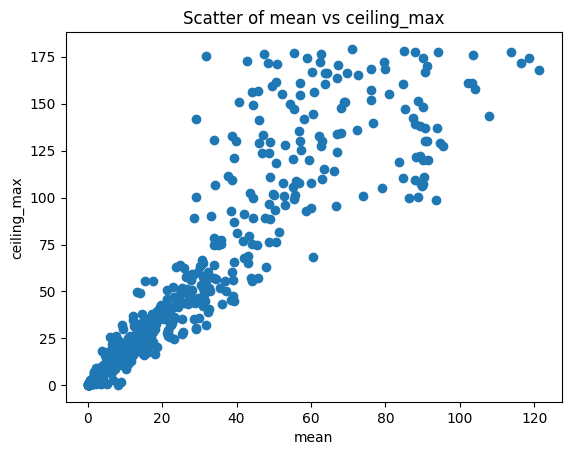

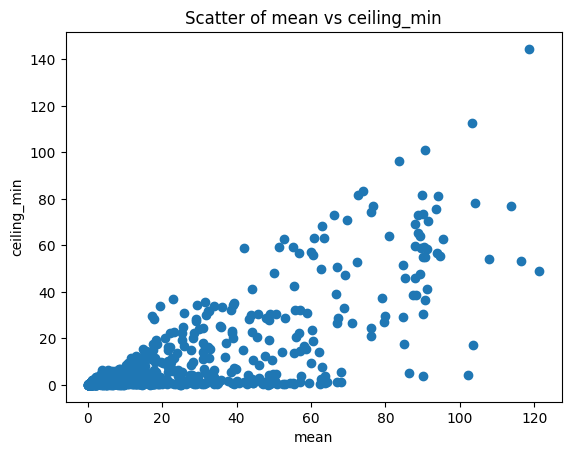

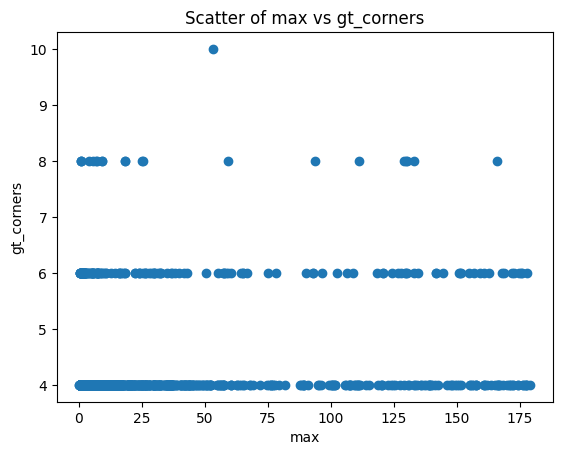

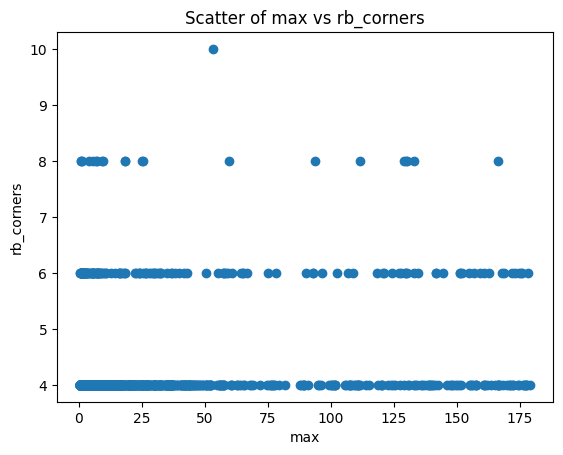

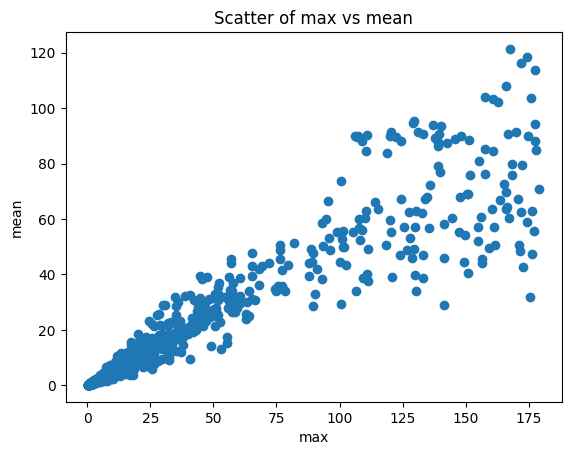

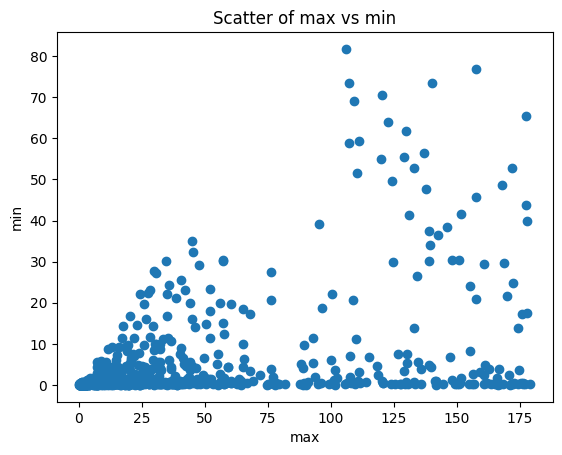

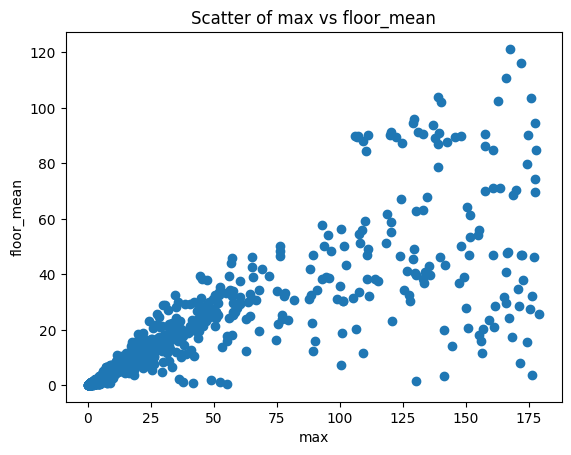

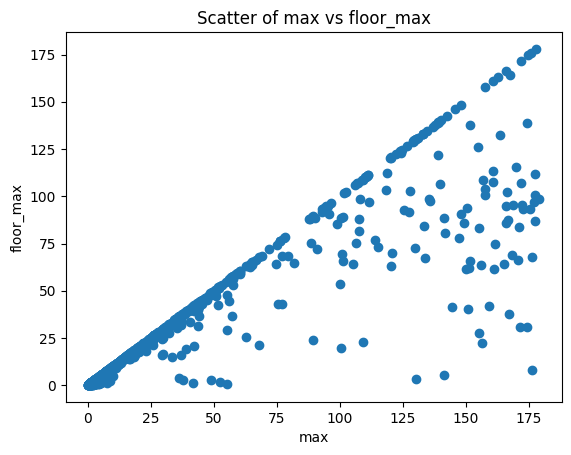

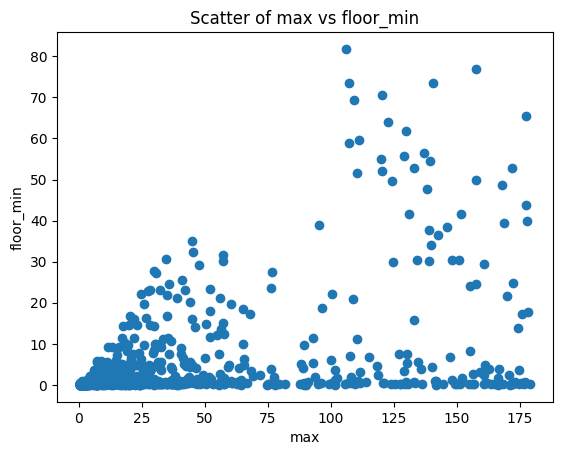

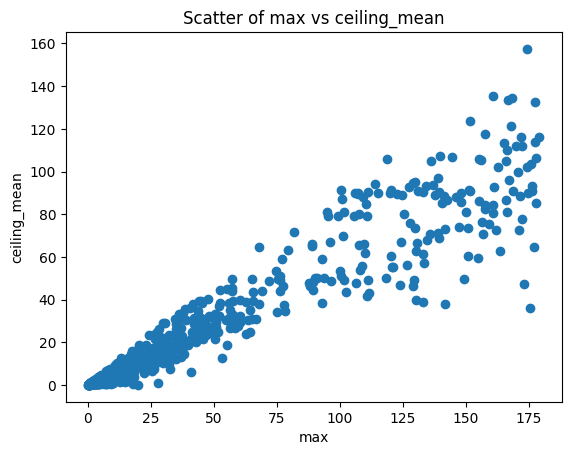

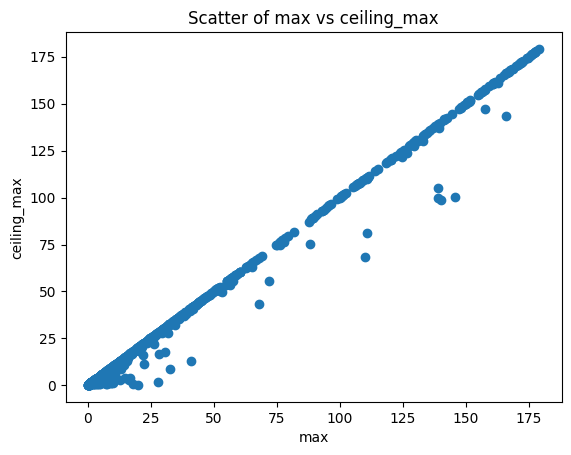

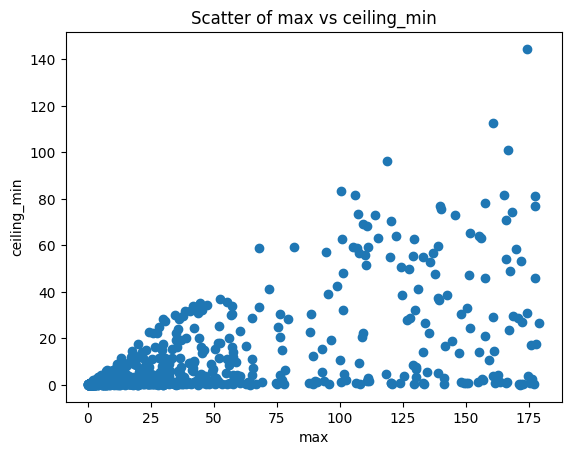

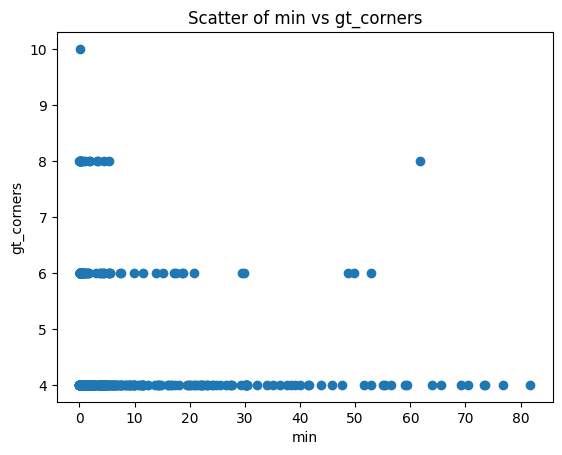

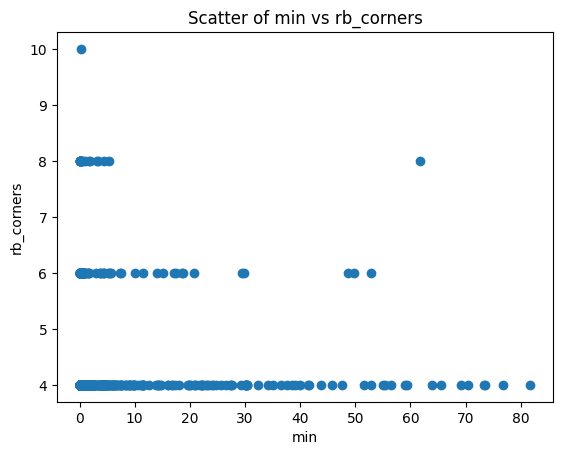

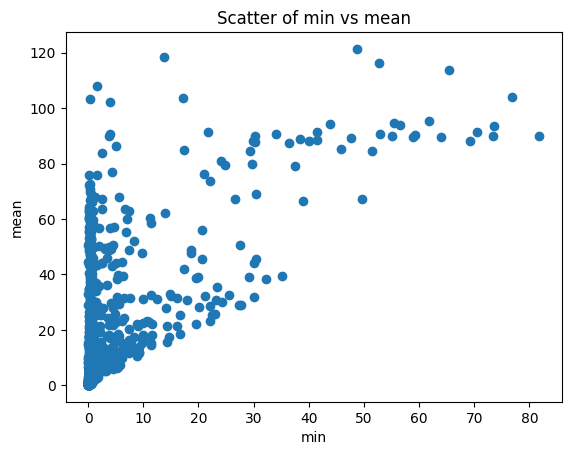

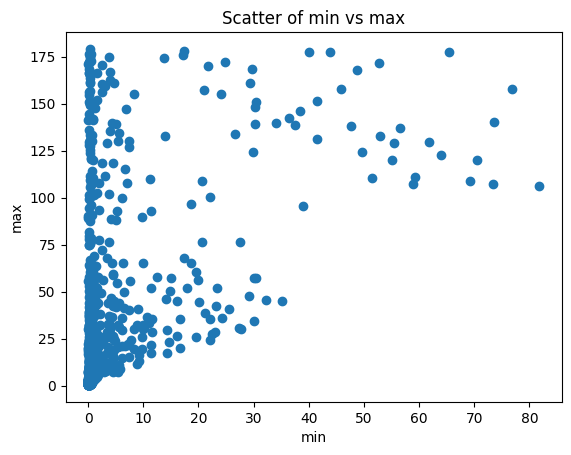

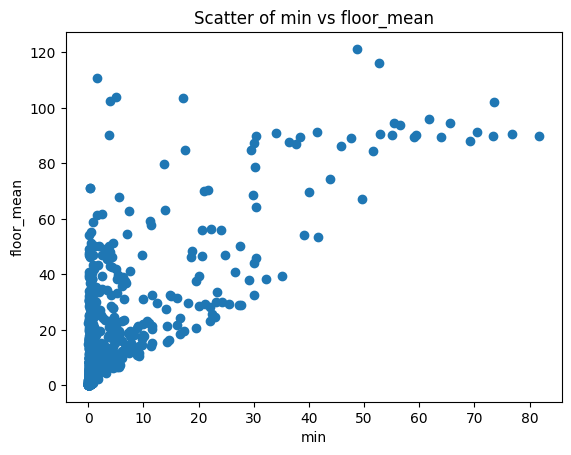

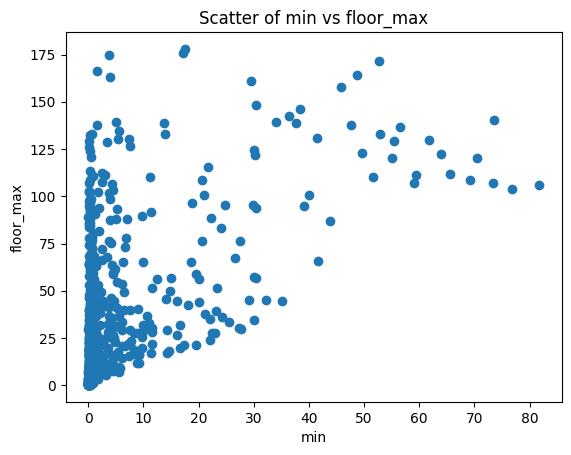

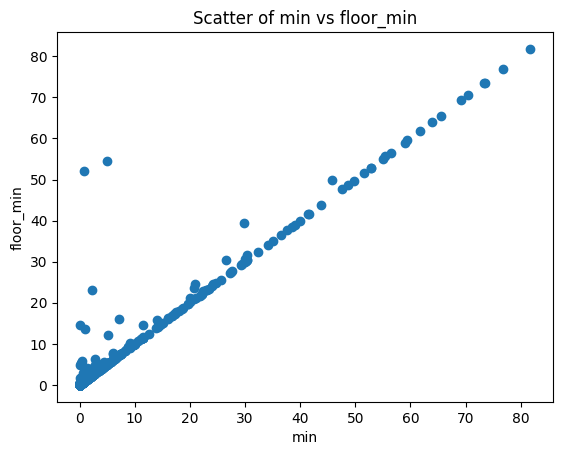

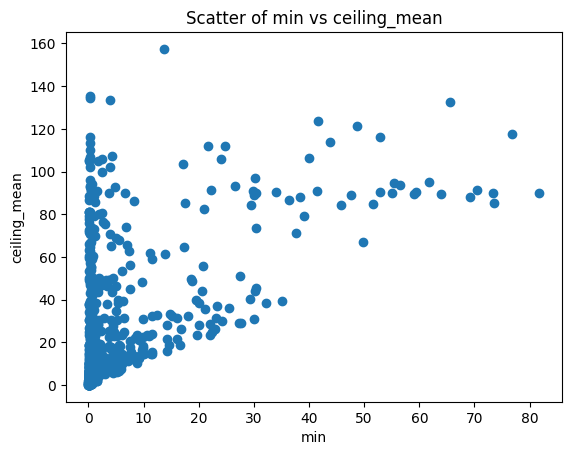

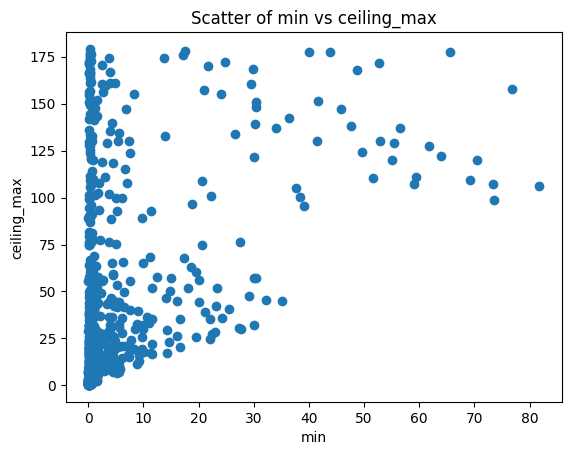

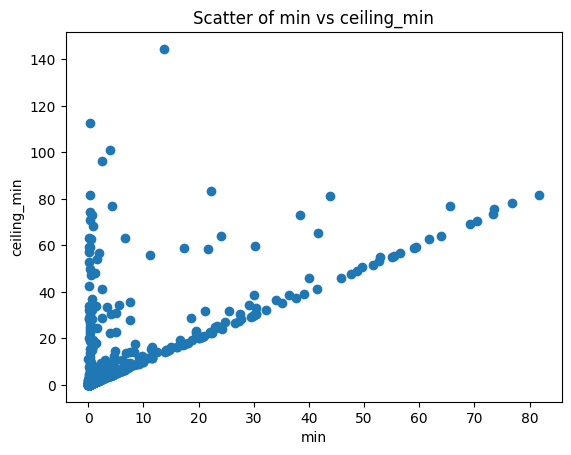

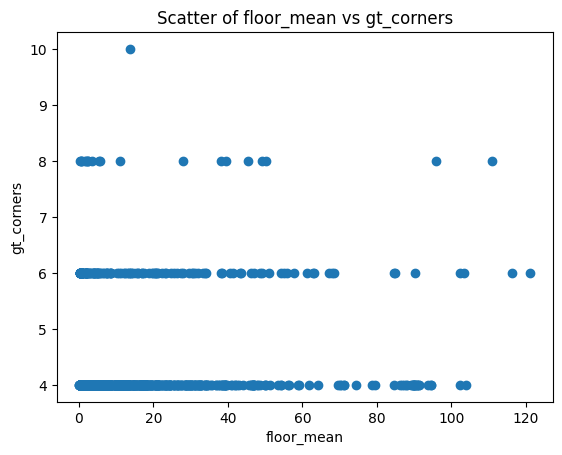

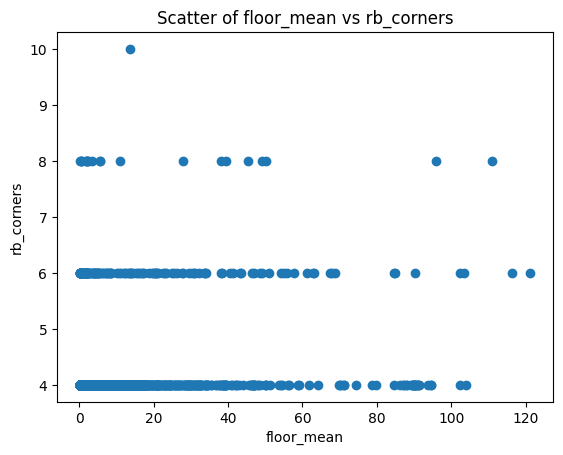

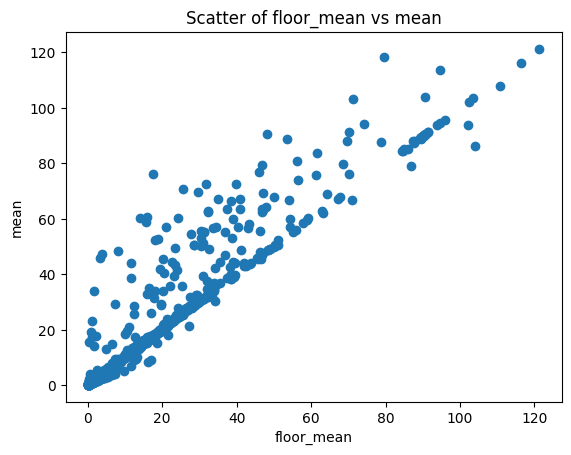

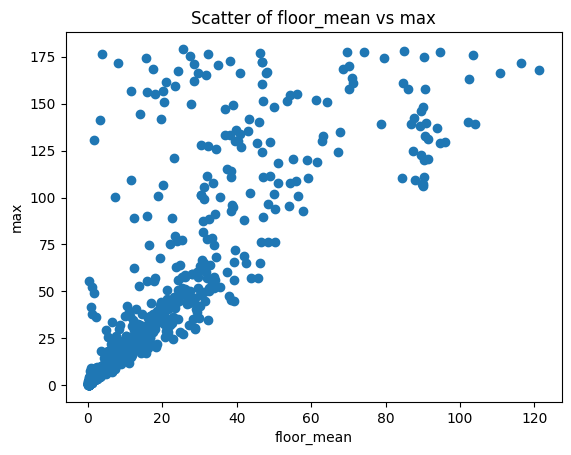

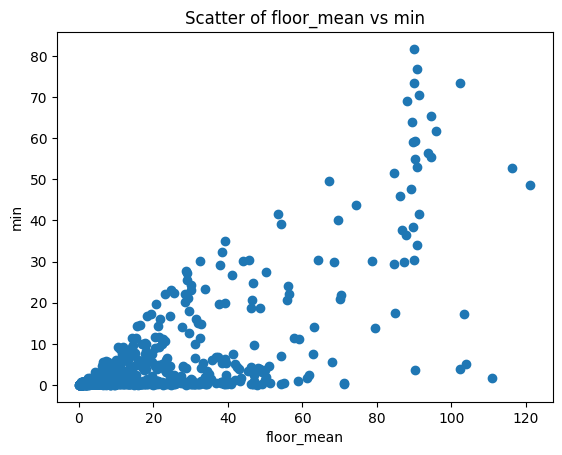

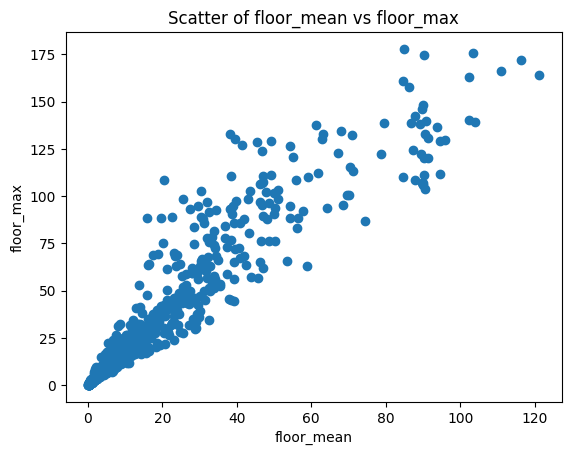

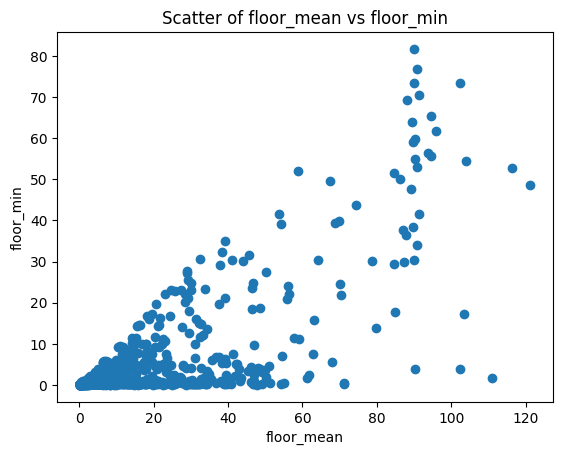

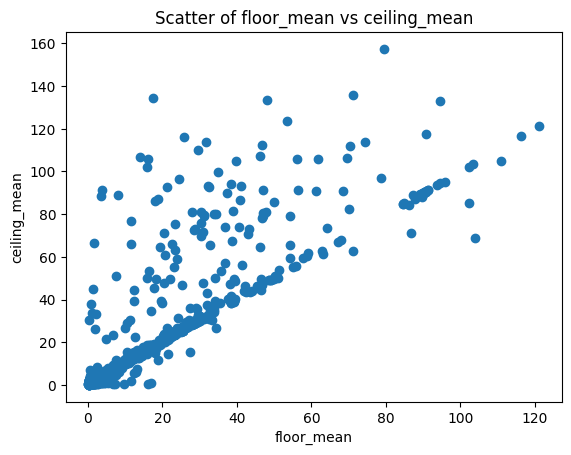

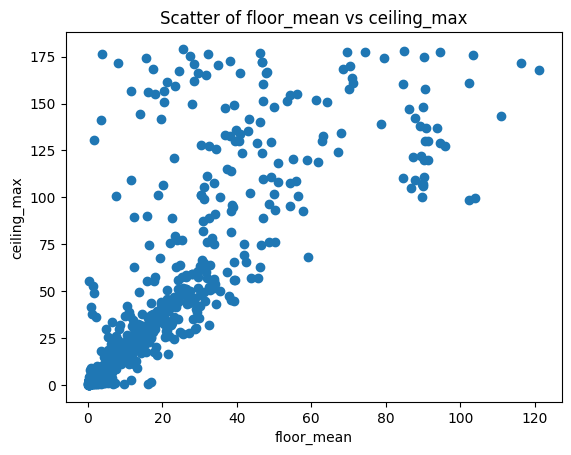

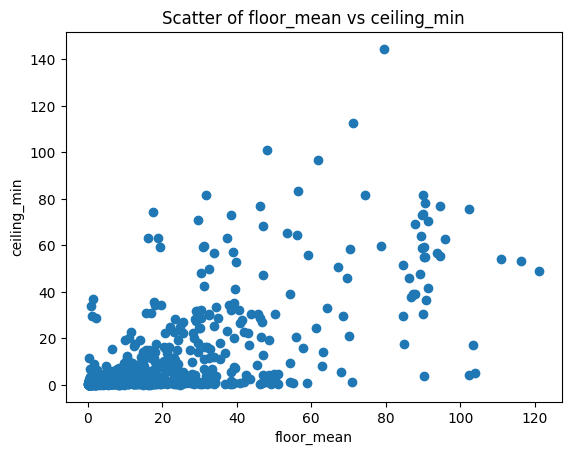

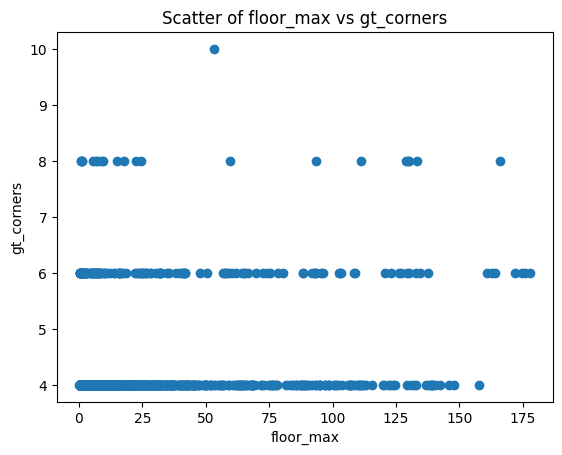

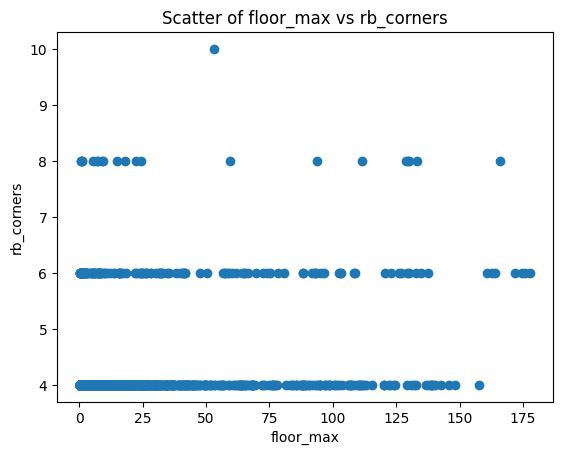

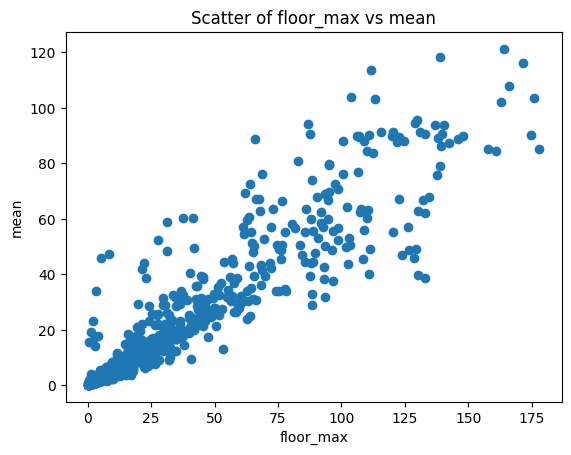

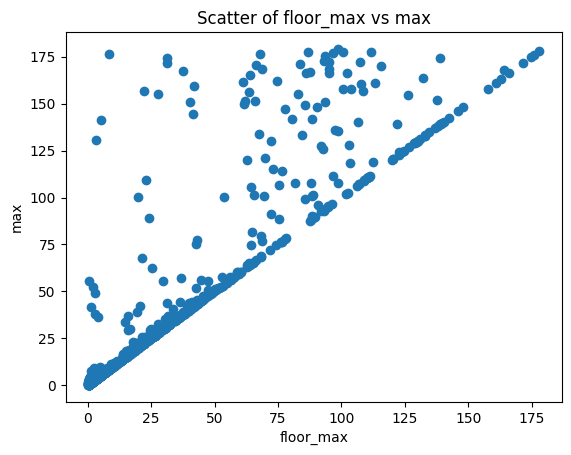

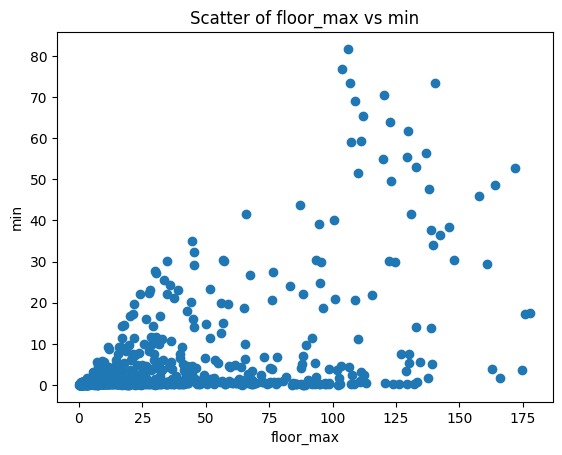

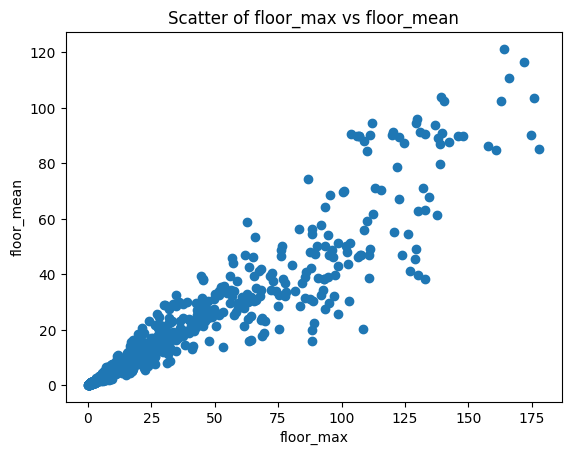

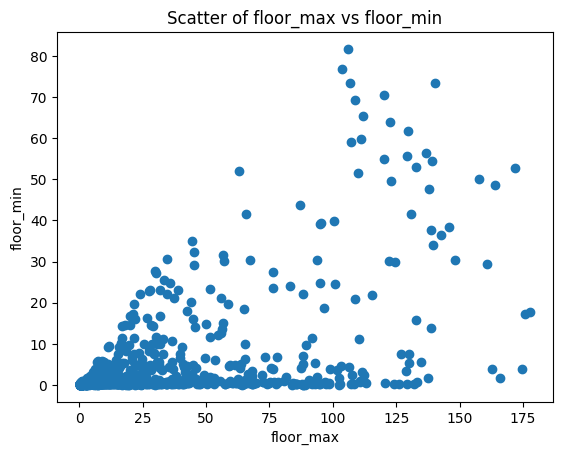

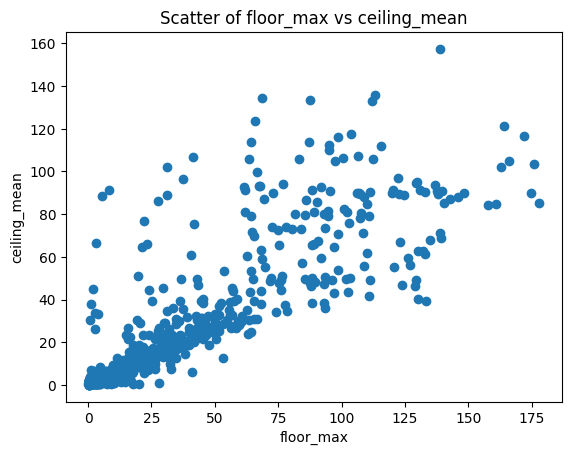

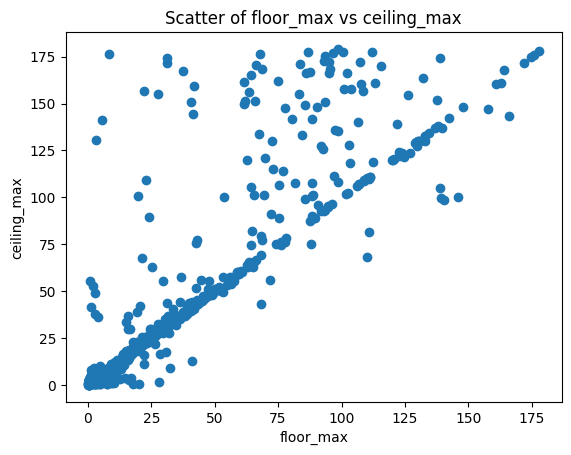

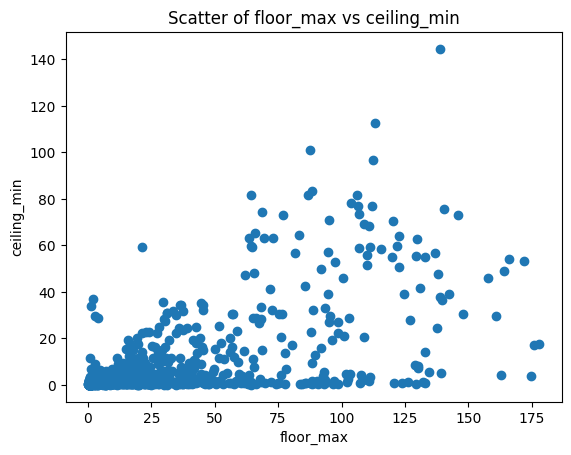

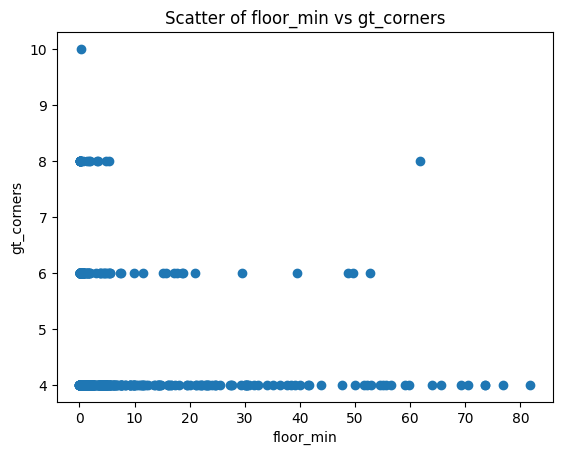

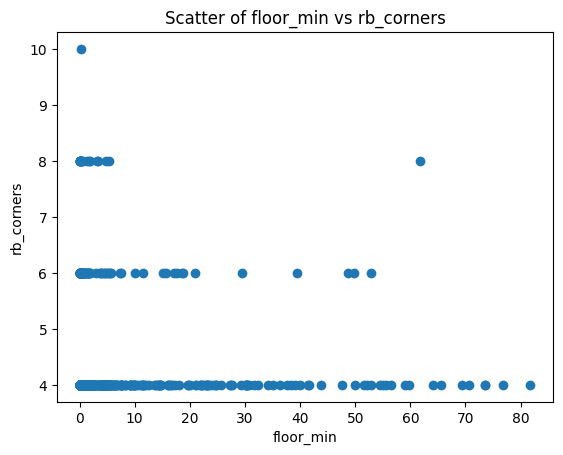

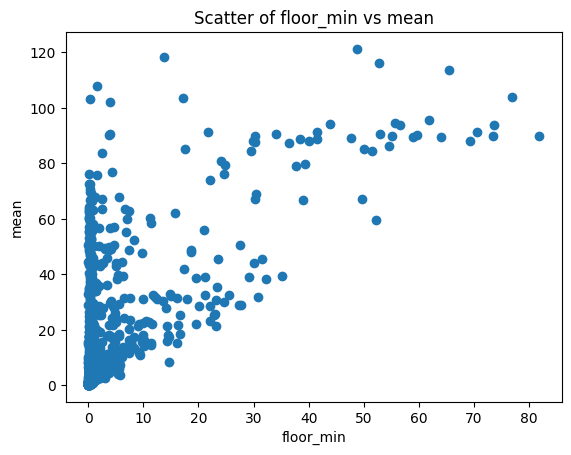

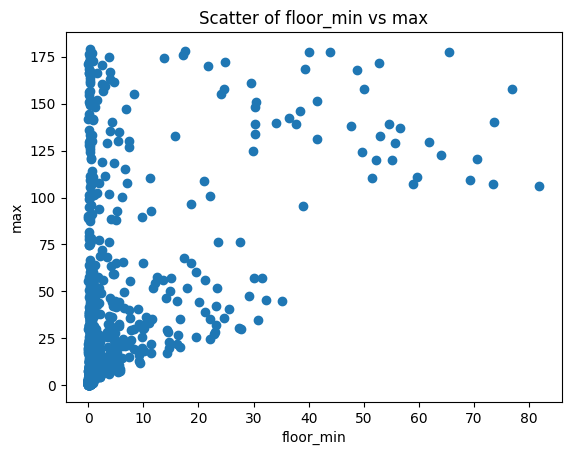

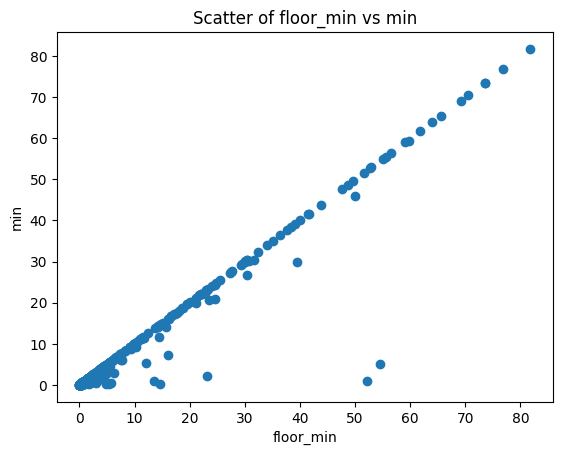

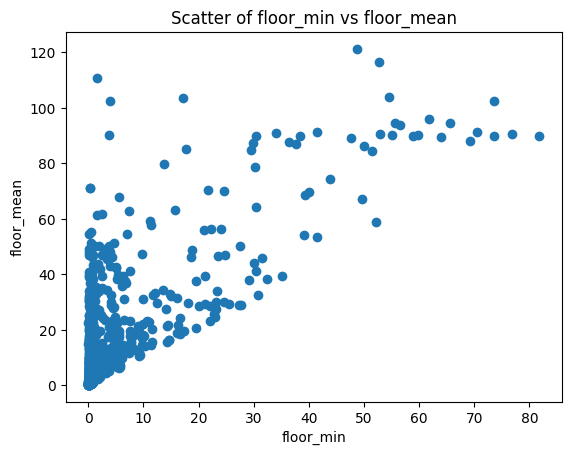

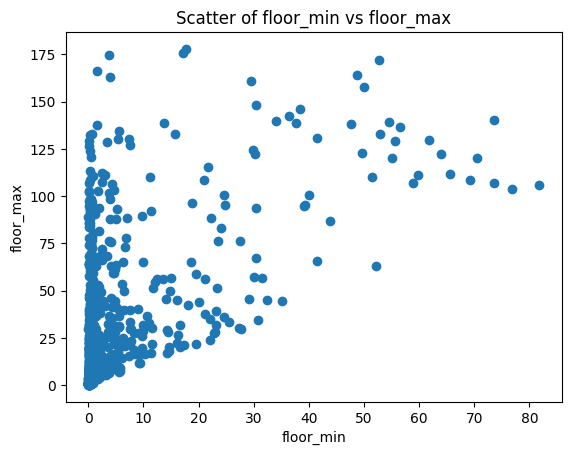

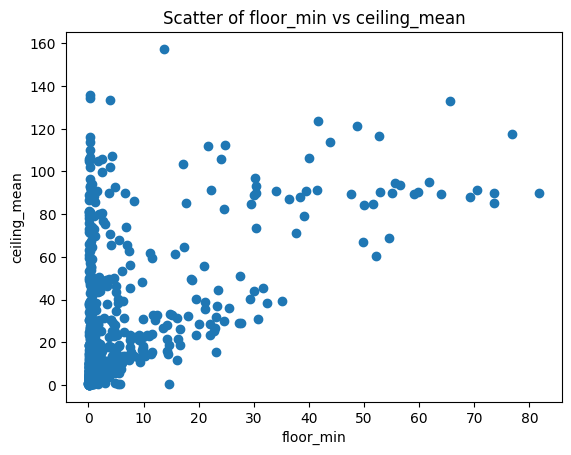

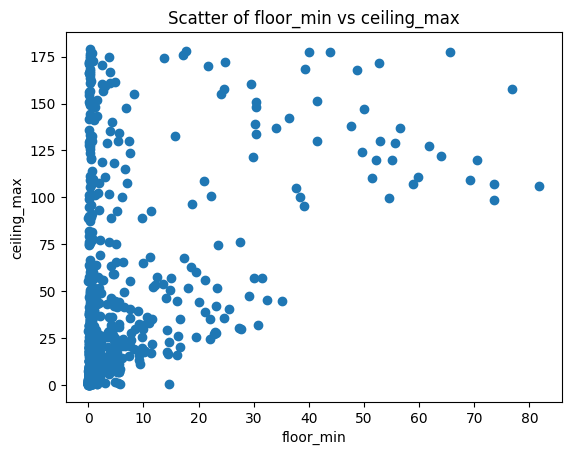

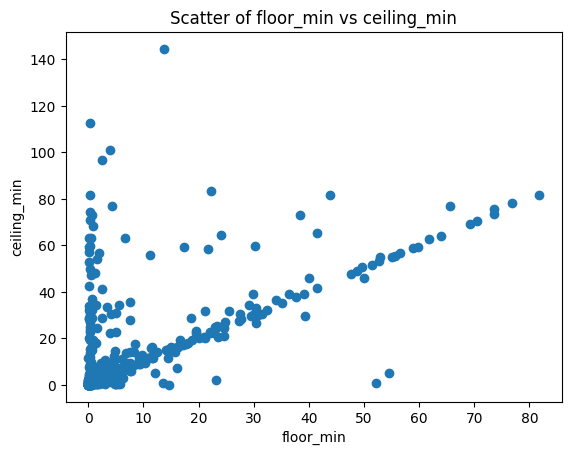

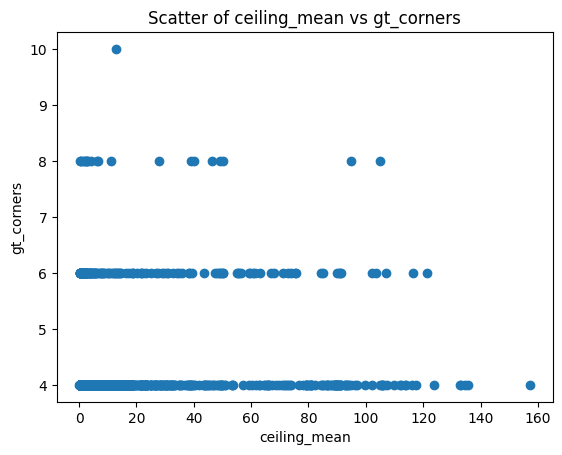

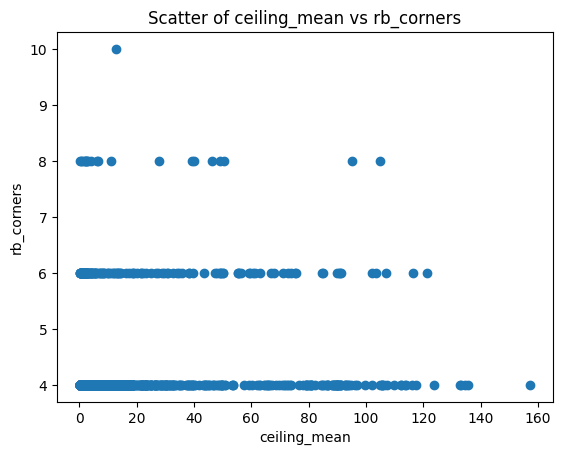

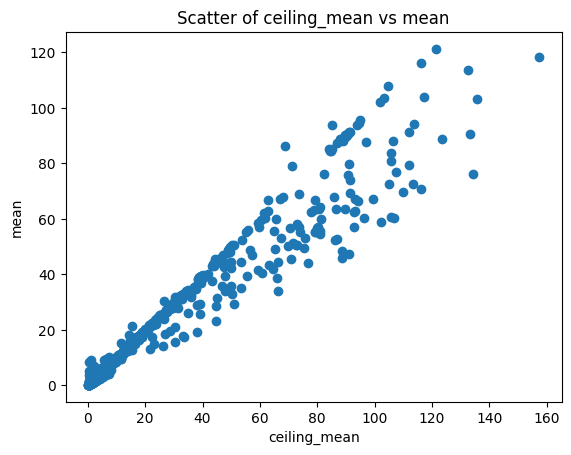

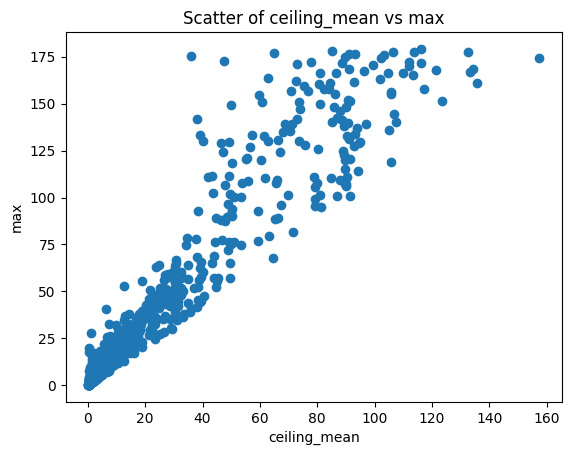

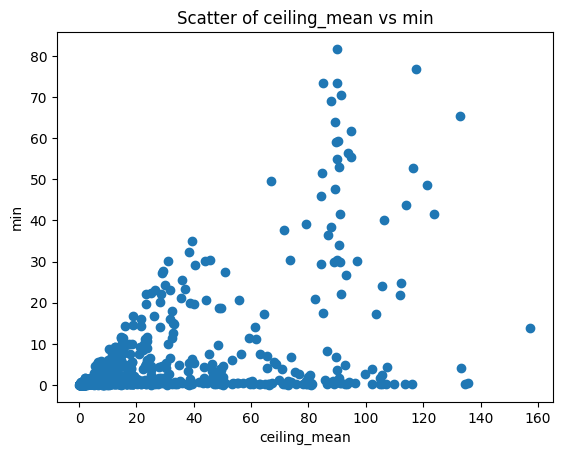

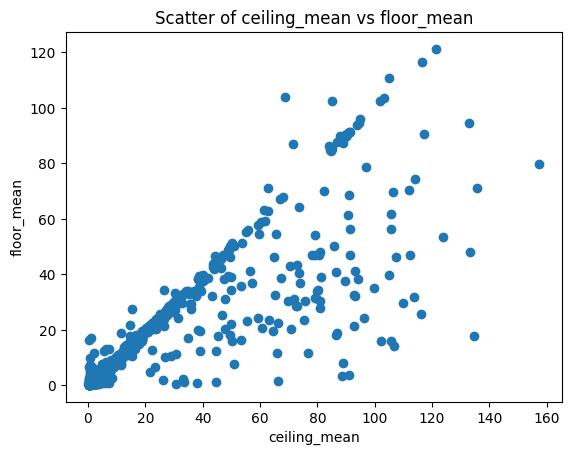

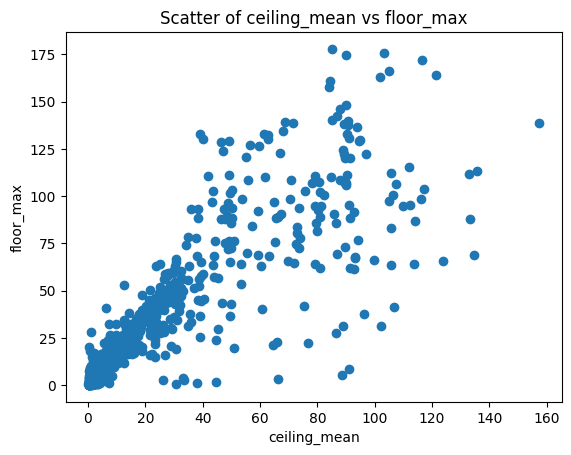

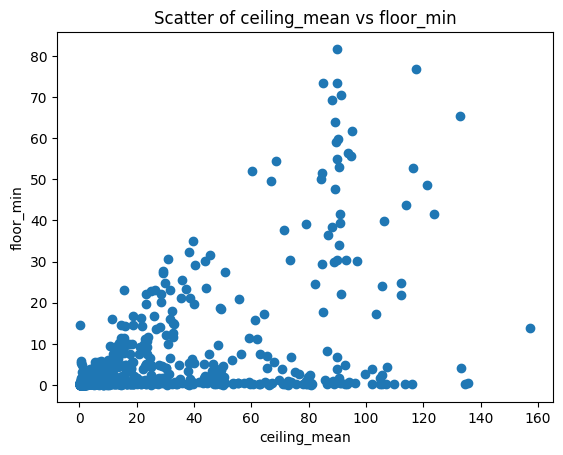

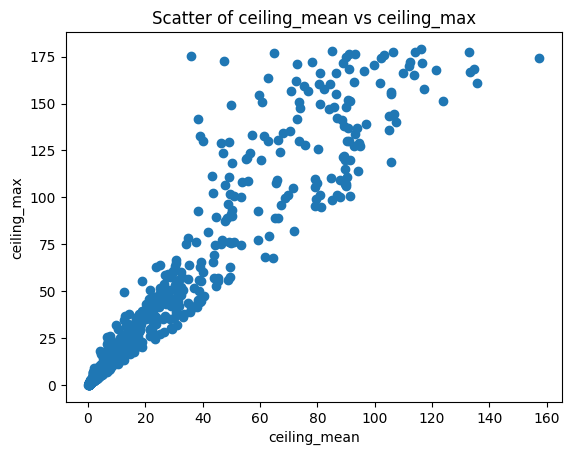

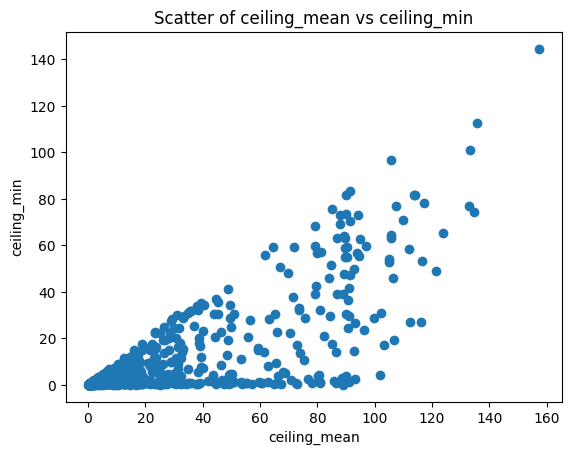

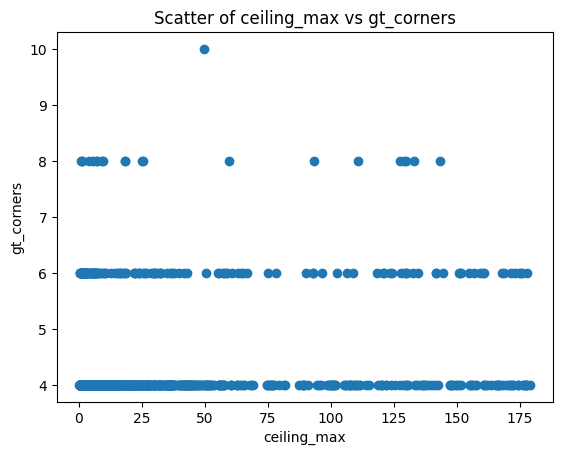

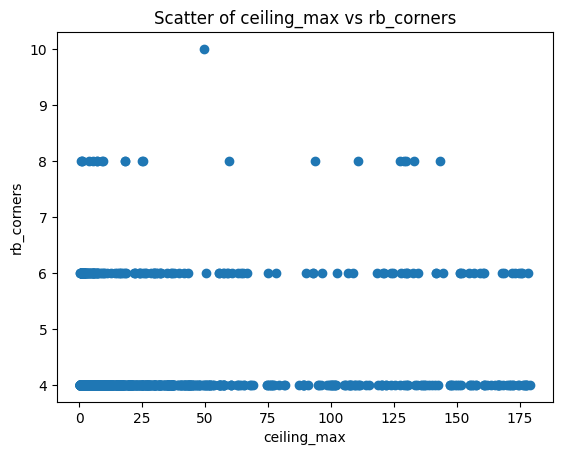

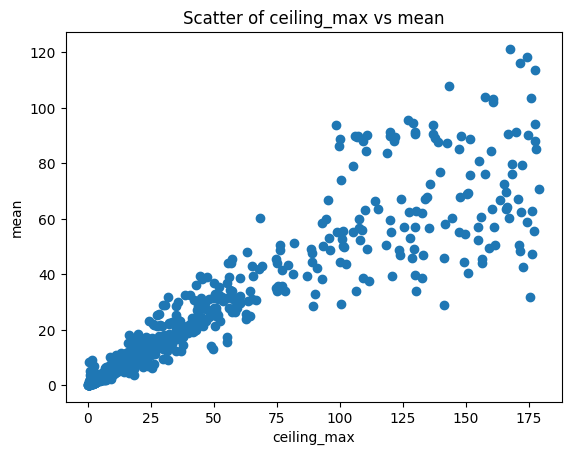

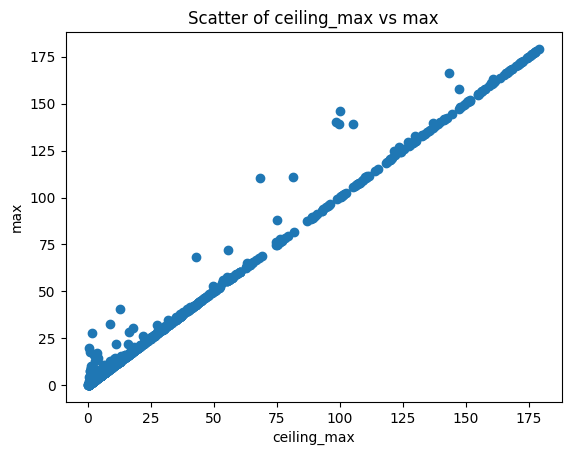

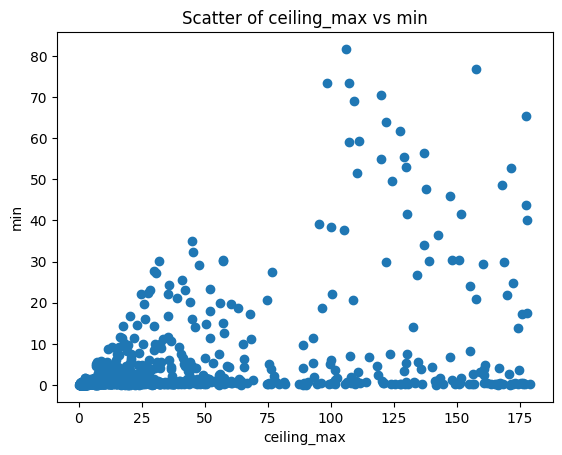

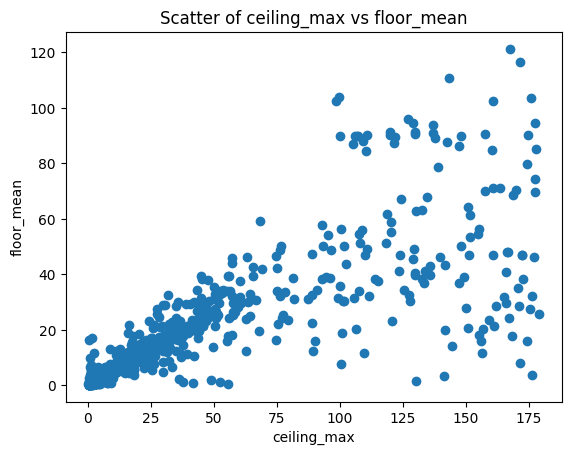

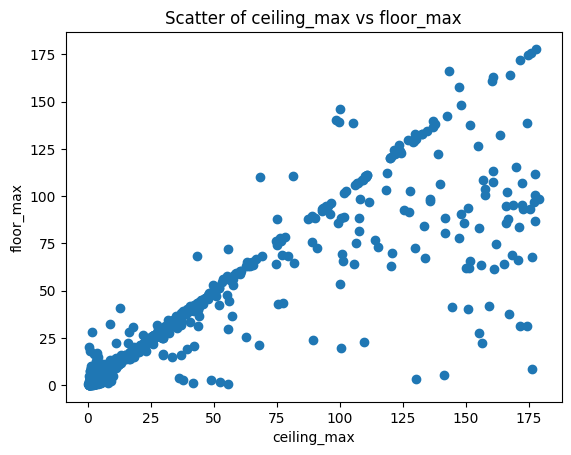

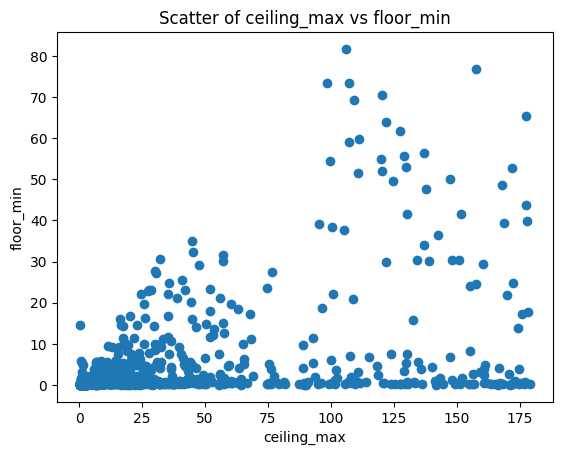

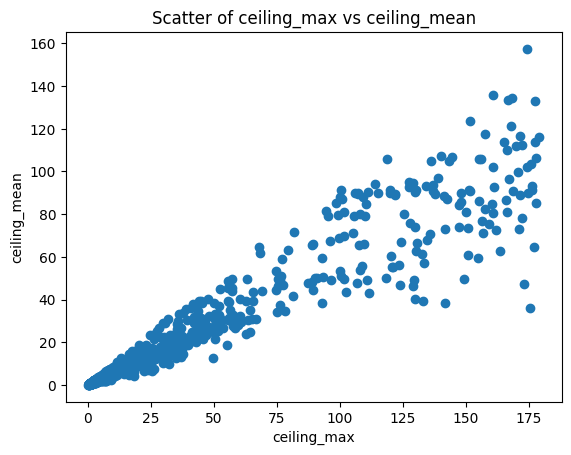

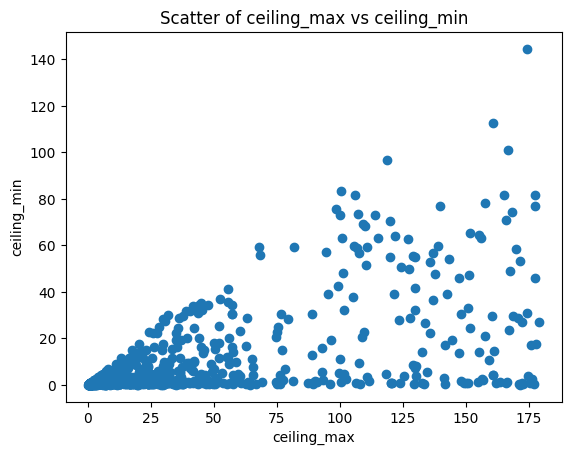

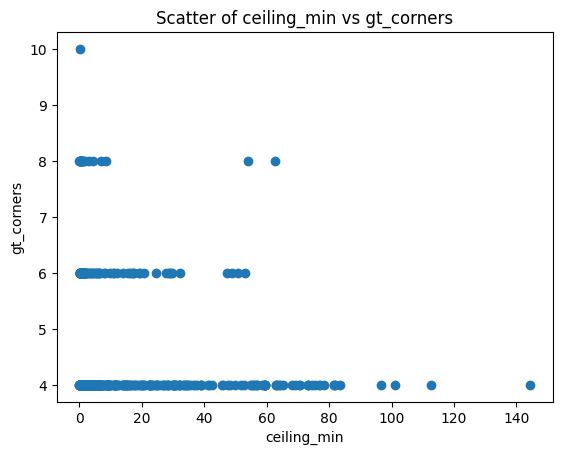

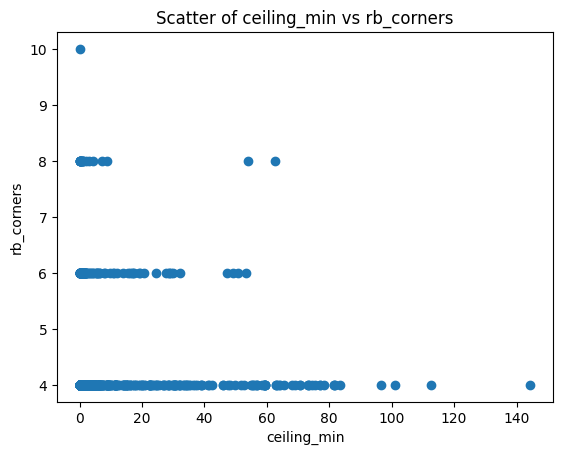

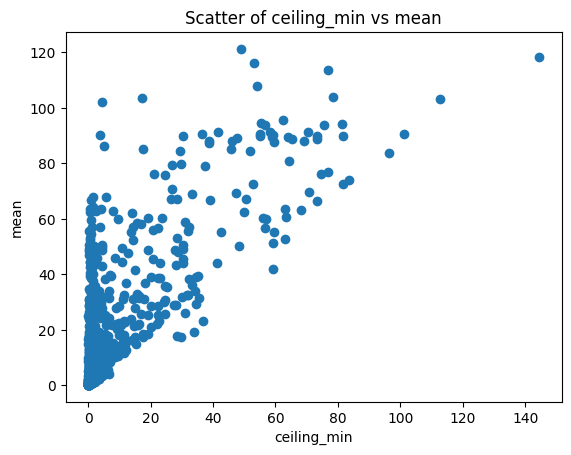

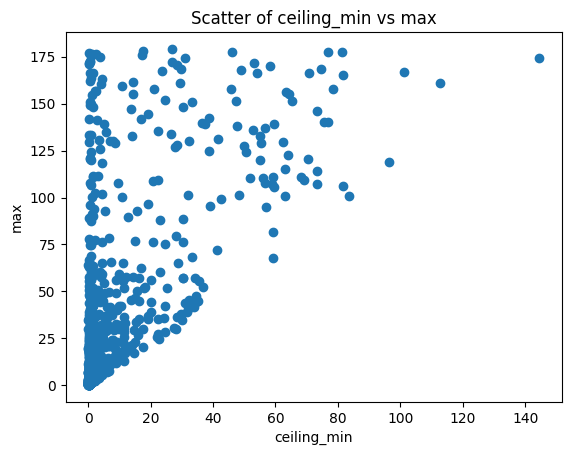

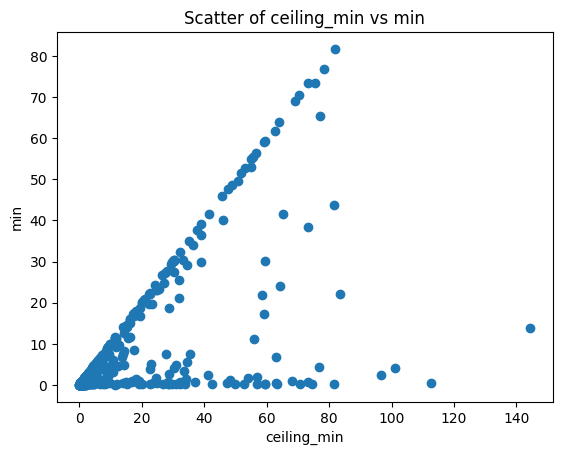

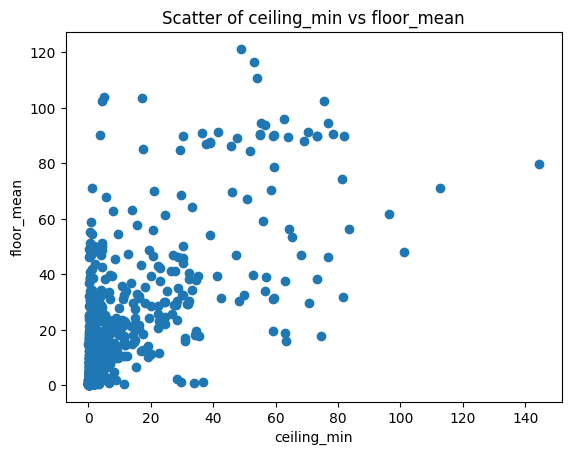

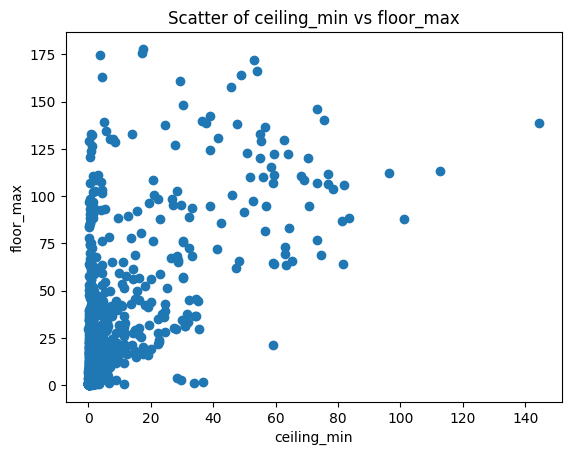

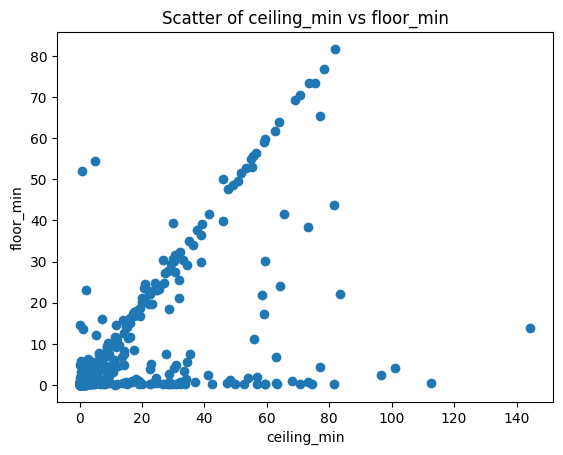

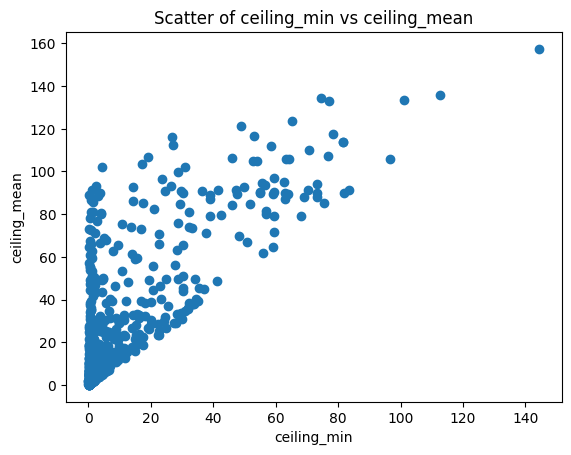

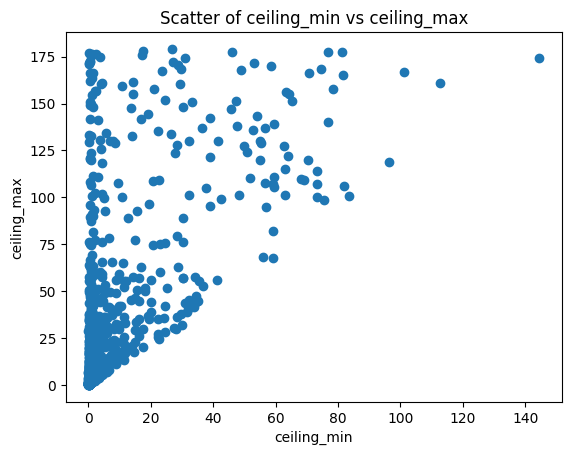

In [20]:
for pair in product(df.columns, df.columns):
    if pair[0] == pair[1]:
        continue
    pl.draw_plot('scatter', *pair)

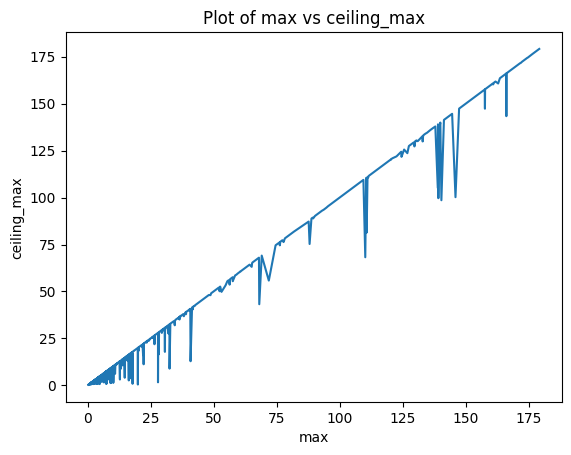

In [27]:
pl.draw_plot('plot', 'max', 'ceiling_max')